In [76]:
!pip install streamlit-option-menu


In [222]:
!pip show streamlit-option-menu


Name: streamlit-option-menu
Version: 0.4.0
Summary: streamlit-option-menu is a simple Streamlit component that allows users to select a single item from a list of options in a menu.
Home-page: https://github.com/victoryhb/streamlit-option-menu
Author: Victor Yan
Author-email: victoryhb@163.com
License: UNKNOWN
Location: C:\Users\dvlha\anaconda3\Lib\site-packages
Requires: streamlit
Required-by: 


In [223]:
import sys
print(sys.executable)


C:\Users\dvlha\anaconda3\python.exe


In [221]:
!pip install scikit-learn


In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,MinMaxScaler,PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,confusion_matrix 

In [78]:
df=pd.read_csv(r"C:\Users\dvlha\OneDrive\Documents\churn prediction application[1]\churn prediction application\CHURN DATA SET.csv")

In [79]:
df

state  account_length      area_code international_plan voice_mail_plan  \
0       OH             107  area_code_415                 no             yes   
1       NJ             137  area_code_415                 no              no   
2       OH              84  area_code_408                yes              no   
3       OK              75  area_code_415                yes              no   
4       MA             121  area_code_510                 no             yes   
...    ...             ...            ...                ...             ...   
4245    MT              83  area_code_415                 no              no   
4246    WV              73  area_code_408                 no              no   
4247    NC              75  area_code_408                 no              no   
4248    HI              50  area_code_408                 no             yes   
4249    VT              86  area_code_415                 no             yes   

      number_vmail_messages  total_day_minutes  total_day_calls  \
0                        26              161.6              123   
1                         0              243.4              114   
2                         0              299.4               71   
3                         0              166.7              113   
4                        24              218.2               88   
...                     ...                ...              ...   
4245                      0              188.3               70   
4246                      0              177.9               89   
4247                      0              170.7              101   
4248                     40              235.7              127   
4249                     34              129.4              102   

      total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0                27.47              195.5              103             16.62   
1                41.38              121.2              110             10.30   
2                50.90               61.9               88              5.26   
3                28.34              148.3              122             12.61   
4                37.09              348.5              108             29.62   
...                ...                ...              ...               ...   
4245             32.01              243.8               88             20.72   
4246             30.24              131.2               82             11.15   
4247             29.02              193.1              126             16.41   
4248             40.07              223.0              126             18.96   
4249             22.00              267.1              104             22.70   

      total_night_minutes  total_night_calls  total_night_charge  \
0                   254.4                103               11.45   
1                   162.6                104                7.32   
2                   196.9                 89                8.86   
3                   186.9                121                8.41   
4                   212.6                118                9.57   
...                   ...                ...                 ...   
4245                213.7                 79                9.62   
4246                186.2                 89                8.38   
4247                129.1                104                5.81   
4248                297.5                116               13.39   
4249                154.8                100                6.97   

      total_intl_minutes  total_intl_calls  total_intl_charge  \
0                   13.7                 3               3.70   
1                   12.2                 5               3.29   
2                    6.6                 7               1.78   
3                   10.1                 3               2.73   
4                    7.5                 7               2.03   
...                  ...               ...                ...   
4245  

In [80]:
df["state"].astype(str).tolist()


['OH',
 'NJ',
 'OH',
 'OK',
 'MA',
 'MO',
 'LA',
 'WV',
 'IN',
 'RI',
 'IA',
 'MT',
 'NY',
 'ID',
 'VA',
 'TX',
 'FL',
 'CO',
 'AZ',
 'SC',
 'VA',
 'WY',
 'MT',
 'MO',
 'HI',
 'NH',
 'AZ',
 'OK',
 'AK',
 'MA',
 'AK',
 'GA',
 'MD',
 'AR',
 'ID',
 'WI',
 'OR',
 'MI',
 'DE',
 'WY',
 'IA',
 'IN',
 'VA',
 'UT',
 'IN',
 'CO',
 'CO',
 'OK',
 'ID',
 'CA',
 'SD',
 'NC',
 'WA',
 'WY',
 'MN',
 'UT',
 'TX',
 'NJ',
 'MN',
 'NM',
 'NV',
 'HI',
 'MN',
 'DC',
 'NY',
 'MN',
 'MD',
 'WV',
 'OR',
 'GA',
 'VT',
 'IN',
 'WV',
 'KY',
 'NJ',
 'DC',
 'LA',
 'AR',
 'ME',
 'AZ',
 'MT',
 'AZ',
 'MS',
 'ID',
 'IA',
 'MA',
 'KY',
 'IN',
 'AZ',
 'MI',
 'NM',
 'UT',
 'MI',
 'AL',
 'DE',
 'AZ',
 'ME',
 'NJ',
 'NV',
 'NE',
 'TX',
 'MD',
 'MS',
 'NV',
 'AZ',
 'MS',
 'MS',
 'TX',
 'NE',
 'CA',
 'NJ',
 'TX',
 'AR',
 'AL',
 'AK',
 'NV',
 'DE',
 'MD',
 'MI',
 'VT',
 'VT',
 'LA',
 'RI',
 'IA',
 'NE',
 'OH',
 'RI',
 'OK',
 'LA',
 'OH',
 'VA',
 'MO',
 'FL',
 'VA',
 'MI',
 'GA',
 'DC',
 'AZ',
 'AL',
 'CO',
 'NM',
 'OR',
 'LA',

In [81]:
df["area_code"]=df["area_code"].apply(lambda x:x[-3:])

In [82]:
df.describe()

account_length  number_vmail_messages  total_day_minutes  \
count     4250.000000            4250.000000        4250.000000   
mean       100.236235               7.631765         180.259600   
std         39.698401              13.439882          54.012373   
min          1.000000               0.000000           0.000000   
25%         73.000000               0.000000         143.325000   
50%        100.000000               0.000000         180.450000   
75%        127.000000              16.000000         216.200000   
max        243.000000              52.000000         351.500000   

       total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
count      4250.000000       4250.000000        4250.000000      4250.000000   
mean         99.907294         30.644682         200.173906       100.176471   
std          19.850817          9.182096          50.249518        19.908591   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.365000         165.925000        87.000000   
50%         100.000000         30.680000         200.700000       100.000000   
75%         113.000000         36.750000         233.775000       114.000000   
max         165.000000         59.760000         359.300000       170.000000   

       total_eve_charge  total_night_minutes  total_night_calls  \
count       4250.000000          4250.000000        4250.000000   
mean          17.015012           200.527882          99.839529   
std            4.271212            50.353548          20.093220   
min            0.000000             0.000000           0.000000   
25%           14.102500           167.225000          86.000000   
50%           17.060000           200.450000         100.000000   
75%           19.867500           234.700000         113.000000   
max           30.540000           395.000000         175.000000   

       total_night_charge  total_intl_minutes  total_intl_calls  \
count         4250.000000         4250.000000       4250.000000   
mean             9.023892           10.256071          4.426353   
std              2.265922            2.760102          2.463069   
min              0.000000            0.000000          0.000000   
25%              7.522500            8.500000          3.000000   
50%              9.020000           10.300000          4.000000   
75%             10.560000           12.000000          6.000000   
max             17.770000           20.000000         20.000000   

       total_intl_charge  number_customer_service_calls  
count        4250.000000                    4250.000000  
mean            2.769654                       1.559059  
std             0.745204                       1.311434  
min             0.000000                       0.000000  
25%             2.300000                       1.000000  
50%             2.780000                       1.000000  
75%             3.240000                       2.000000  
max             5.400000                       9.000000

In [83]:
df.head()


state  account_length area_code international_plan voice_mail_plan  \
0    OH             107       415                 no             yes   
1    NJ             137       415                 no              no   
2    OH              84       408                yes              no   
3    OK              75       415                yes              no   
4    MA             121       510                 no             yes   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     26              161.6              123   
1                      0              243.4              114   
2                      0              299.4               71   
3                      0              166.7              113   
4                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5              103             16.62   
1             41.38              121.2              110             10.30   
2             50.90               61.9               88              5.26   
3             28.34              148.3              122             12.61   
4             37.09              348.5              108             29.62   

   total_night_minutes  total_night_calls  total_night_charge  \
0                254.4                103               11.45   
1                162.6                104                7.32   
2                196.9                 89                8.86   
3                186.9                121                8.41   
4                212.6                118                9.57   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                13.7                 3               3.70   
1                12.2                 5               3.29   
2                 6.6                 7               1.78   
3                10.1                 3               2.73   
4                 7.5                 7               2.03   

   number_customer_service_calls churn  
0                              1    no  
1                              0    no  
2                              2    no  
3                              3    no  
4                              3    no

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [85]:
df["area_code"]=df["area_code"].astype("int")


In [86]:
df[df.isnull()].sum()


state                              0
account_length                   0.0
area_code                        0.0
international_plan                 0
voice_mail_plan                    0
number_vmail_messages            0.0
total_day_minutes                0.0
total_day_calls                  0.0
total_day_charge                 0.0
total_eve_minutes                0.0
total_eve_calls                  0.0
total_eve_charge                 0.0
total_night_minutes              0.0
total_night_calls                0.0
total_night_charge               0.0
total_intl_minutes               0.0
total_intl_calls                 0.0
total_intl_charge                0.0
number_customer_service_calls    0.0
churn                              0
dtype: object

In [87]:
df[df.duplicated]

Empty DataFrame
Columns: [state, account_length, area_code, international_plan, voice_mail_plan, number_vmail_messages, total_day_minutes, total_day_calls, total_day_charge, total_eve_minutes, total_eve_calls, total_eve_charge, total_night_minutes, total_night_calls, total_night_charge, total_intl_minutes, total_intl_calls, total_intl_charge, number_customer_service_calls, churn]
Index: []

In [88]:
#detecting the outliers with boxplot

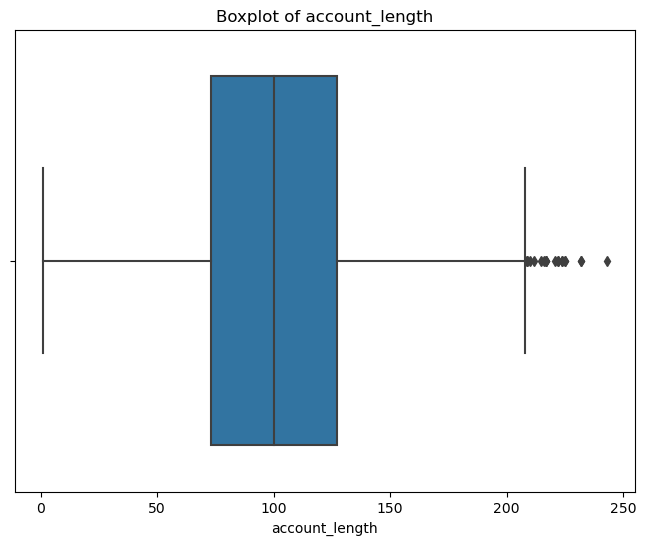

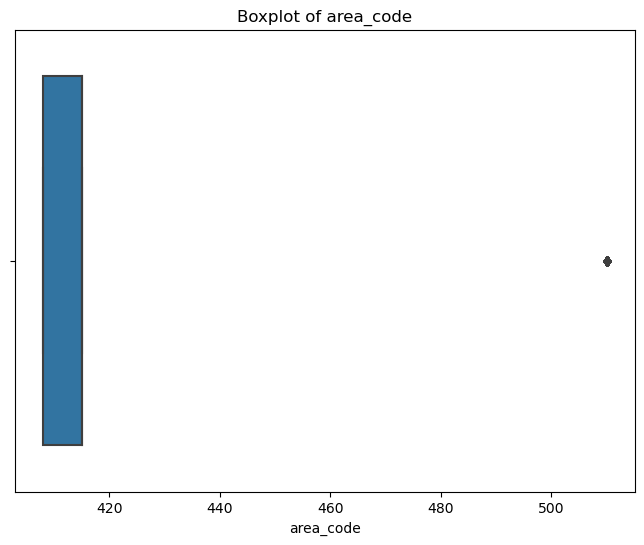

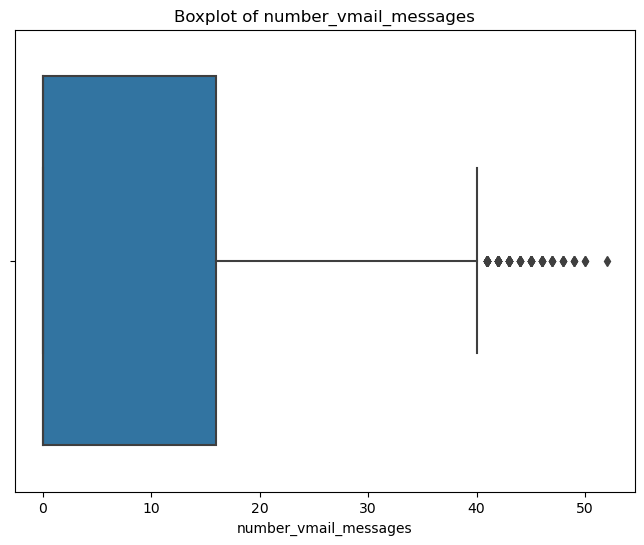

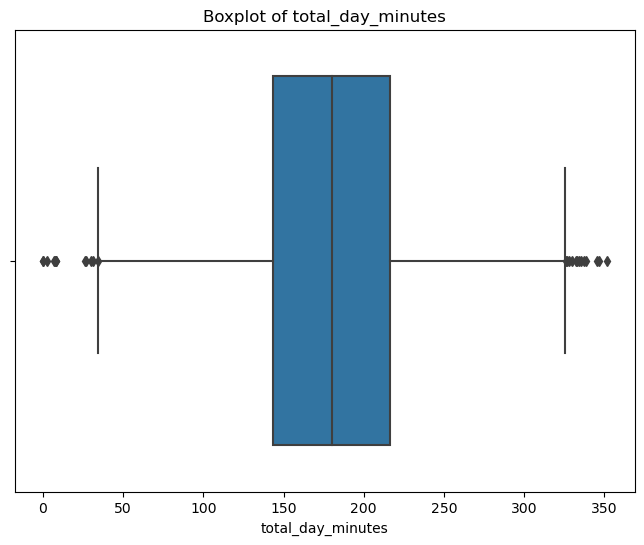

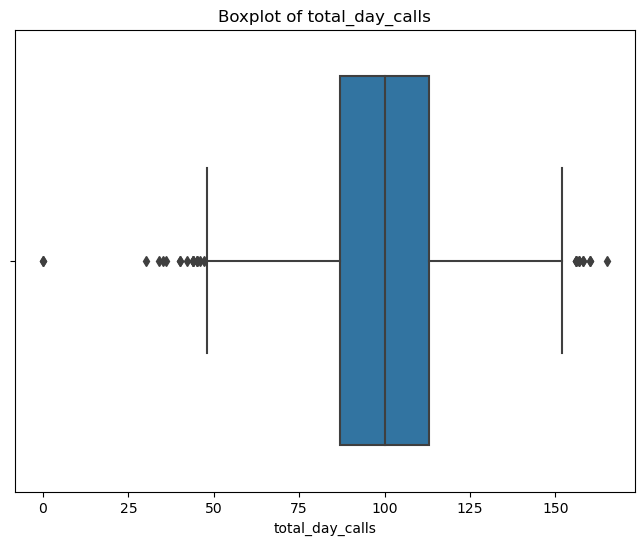

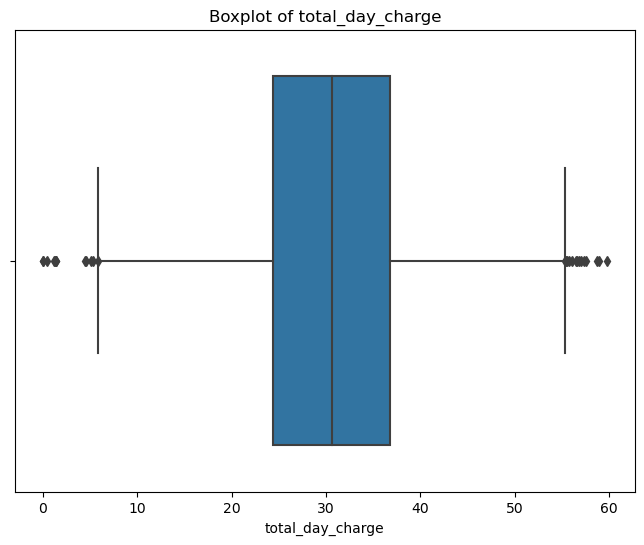

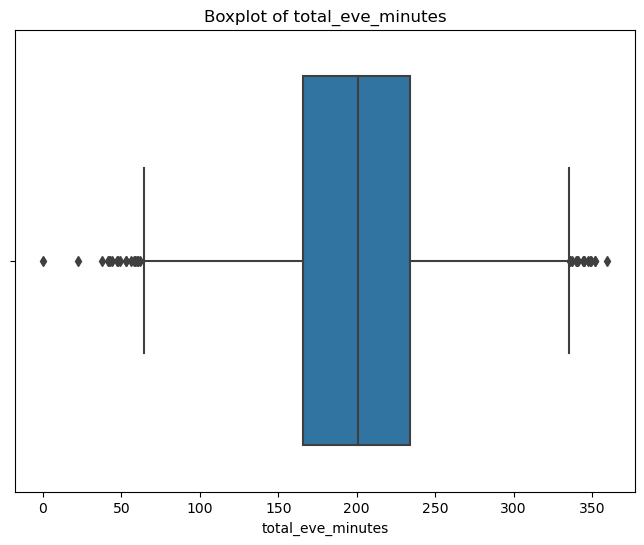

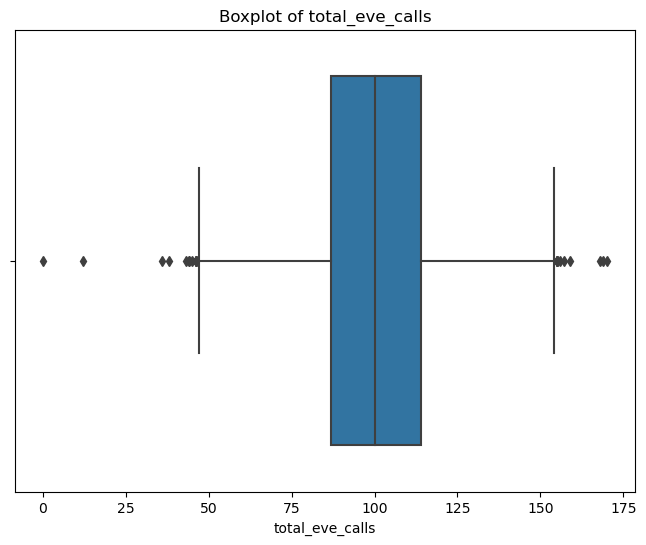

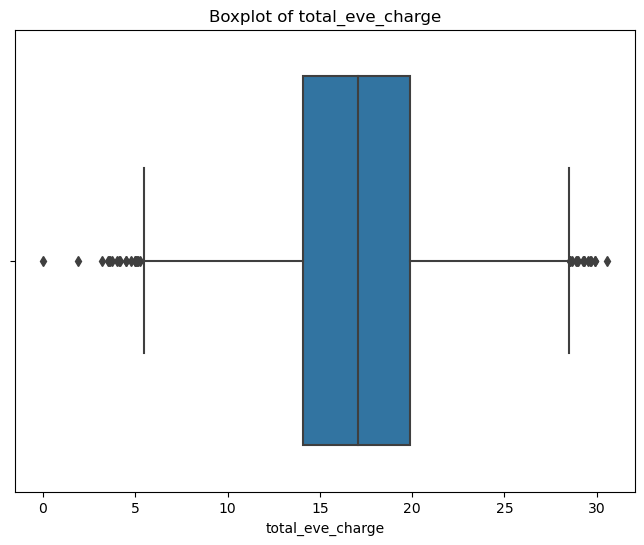

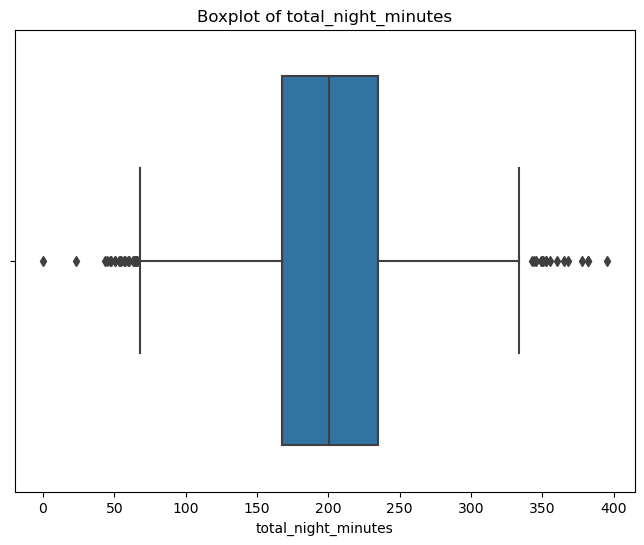

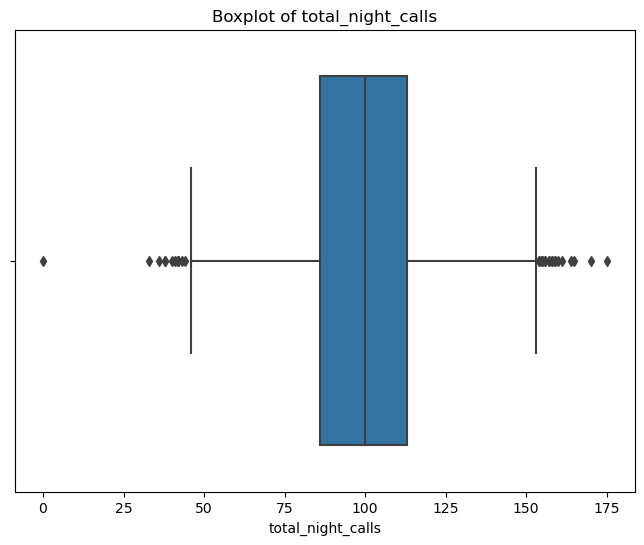

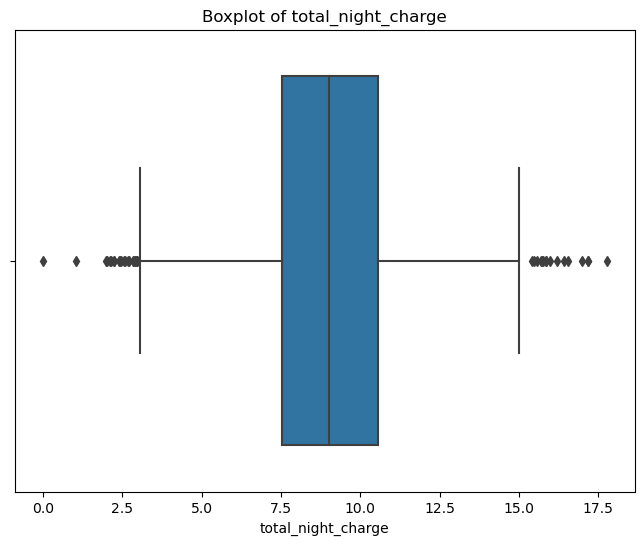

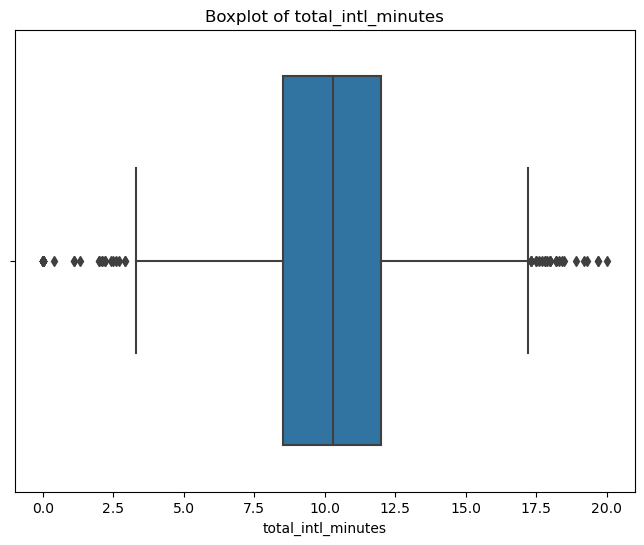

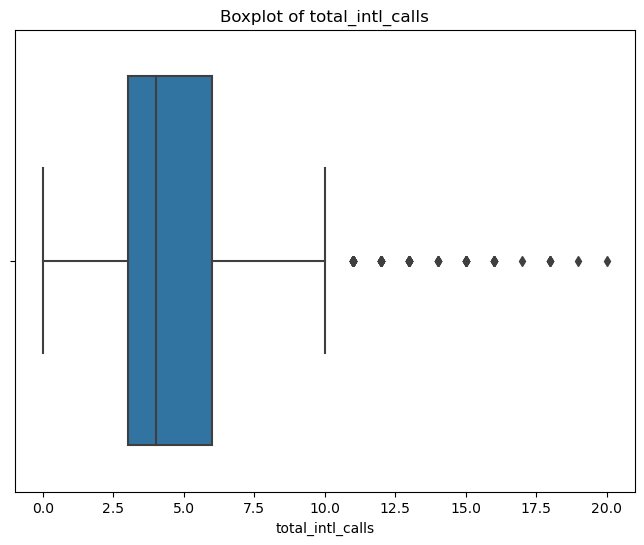

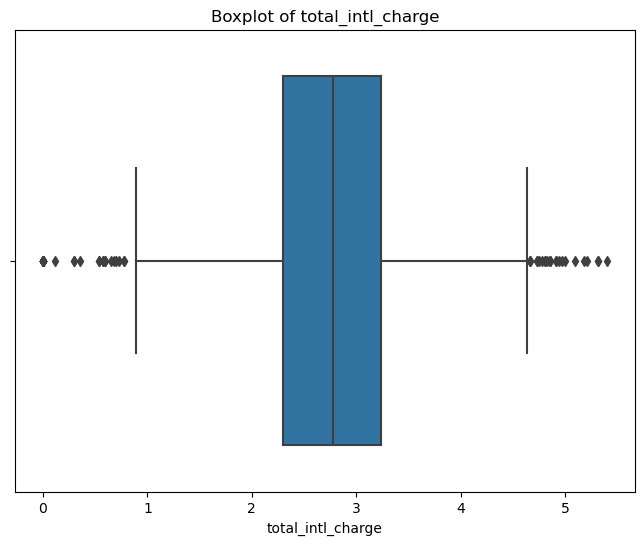

In [89]:

# df2 with only numeric vaiables

df2=df.drop(['state', 'churn', 'international_plan', 'voice_mail_plan',"number_customer_service_calls"],axis=1)




for i in df2.columns:
    plt.figure(figsize=(8, 6))  
    sns.boxplot(x=df[i])
    plt.title(f'Boxplot of {i}')
    plt.show()




In [90]:
# fuction for caping the outliers by iqr method

def iqr(column):
    q1 = np.quantile(column, 0.25)
    q3 = np.quantile(column, 0.75)
    rang = q3 - q1
    right = q3 + rang * 1.5
    left = q1 - rang * 1.5
    
    # Caping extreme values
    column[column > right] = right
    column[column < left] = left

    return column

In [91]:
for i in df2:
    
    df[i] = iqr(df[i])




C:\Users\dvlha\AppData\Local\Temp\ipykernel_21748\294492628.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column > right] = right
C:\Users\dvlha\AppData\Local\Temp\ipykernel_21748\294492628.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column < left] = left


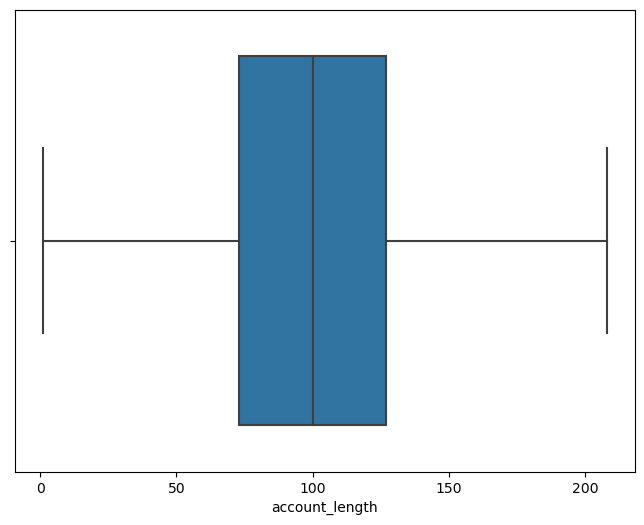

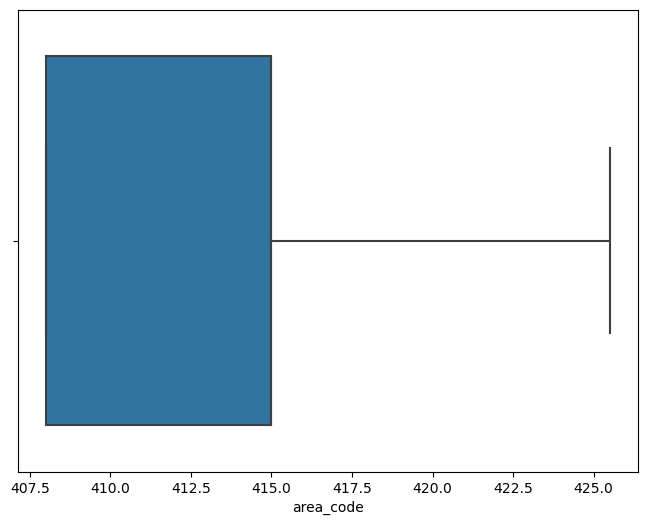

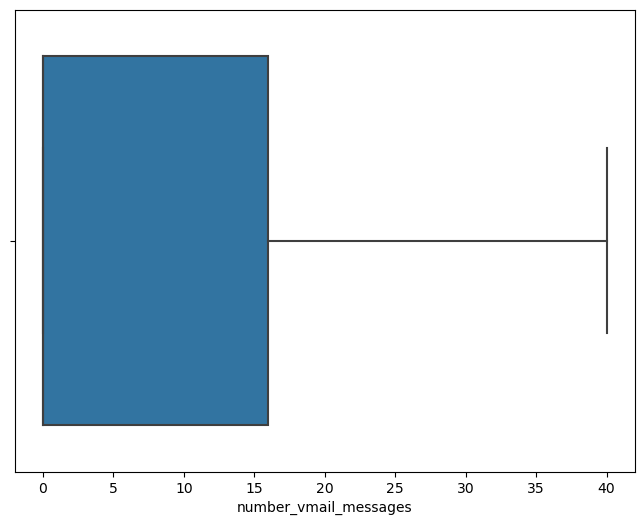

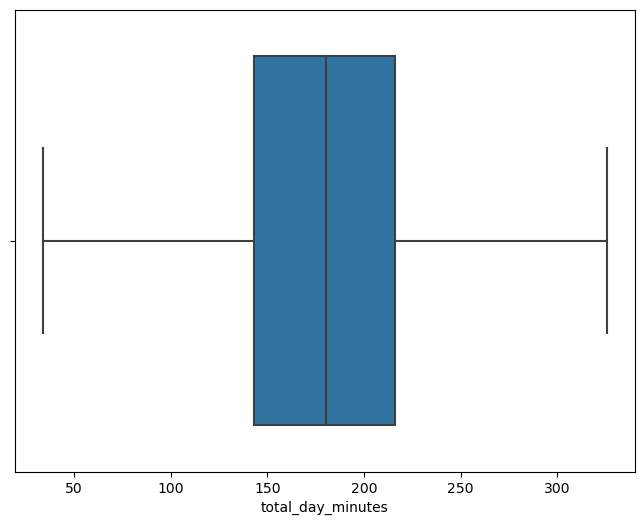

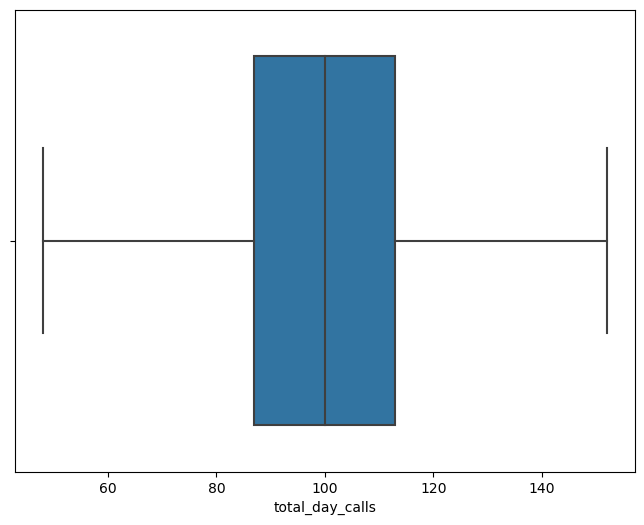

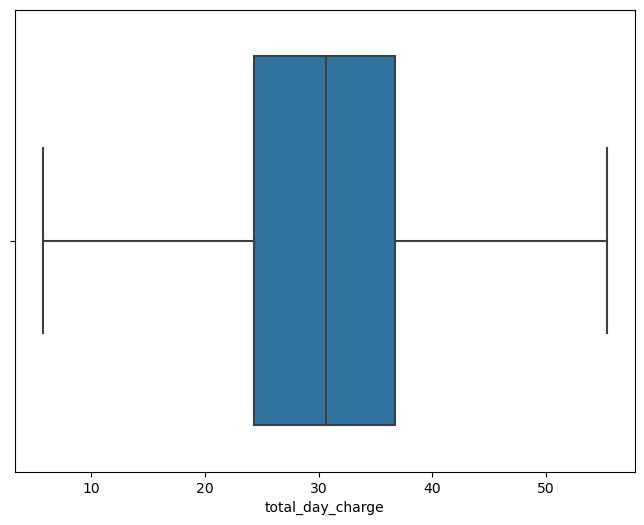

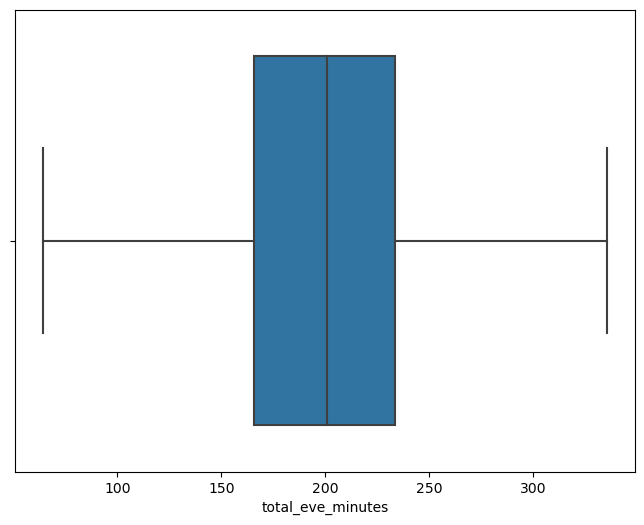

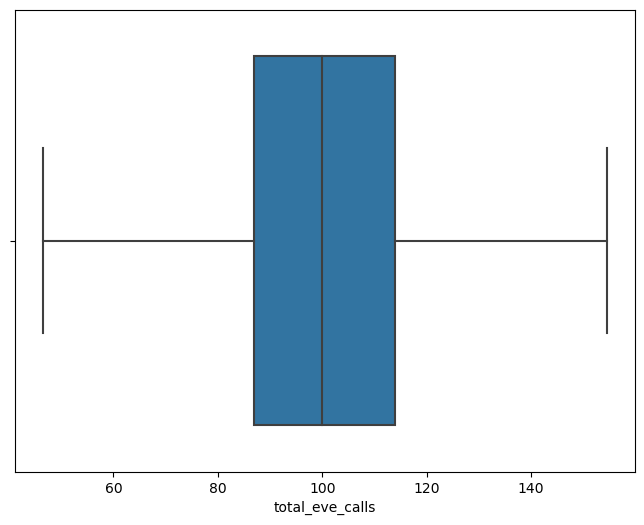

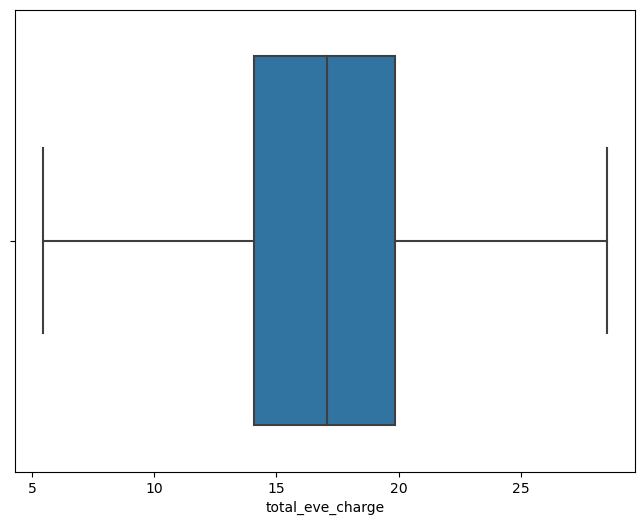

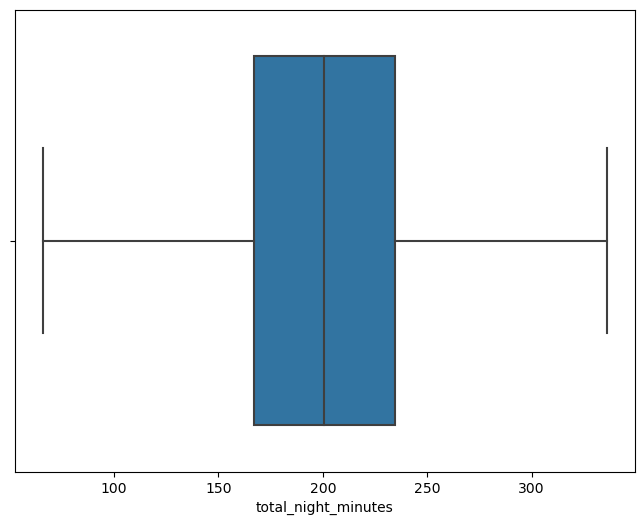

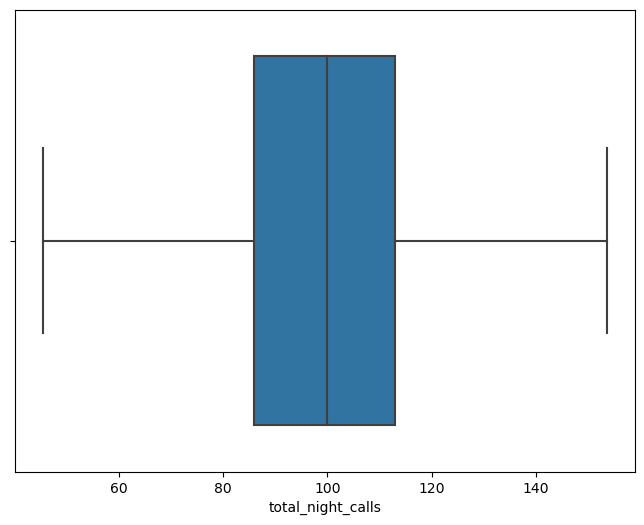

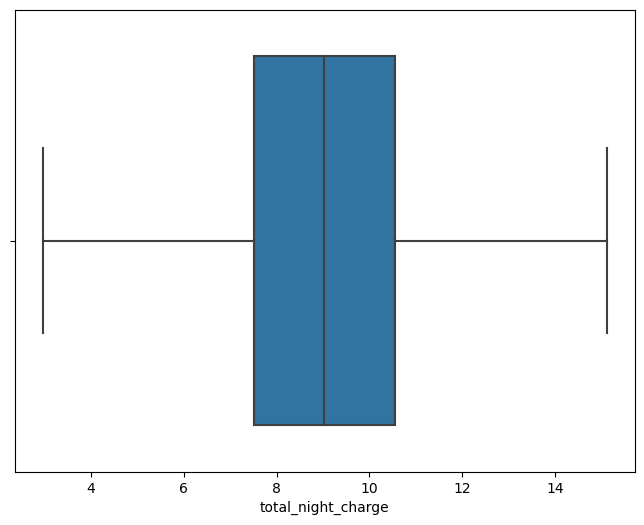

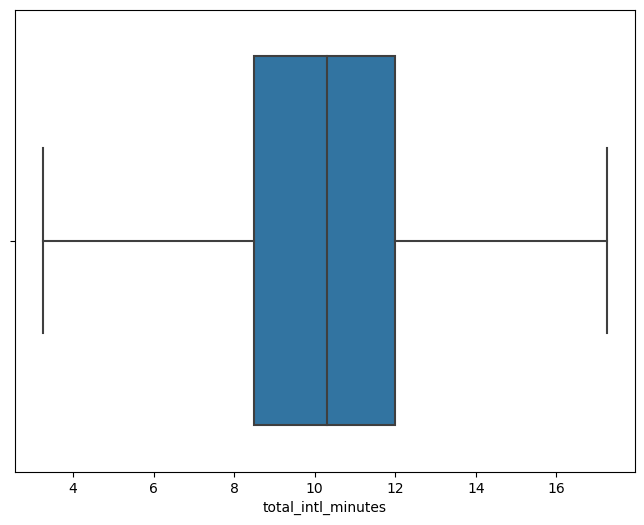

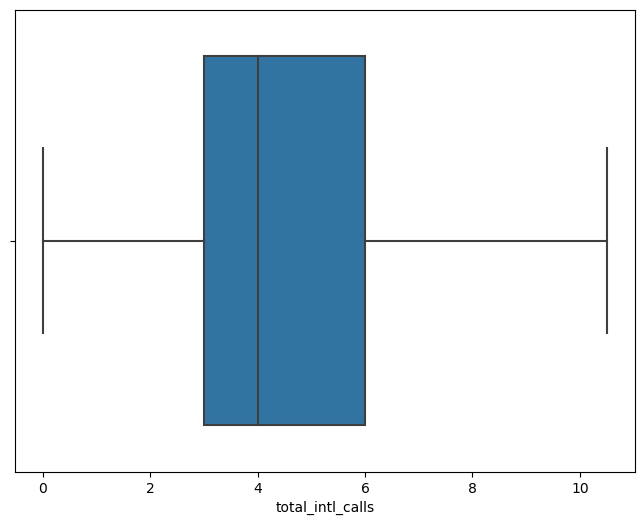

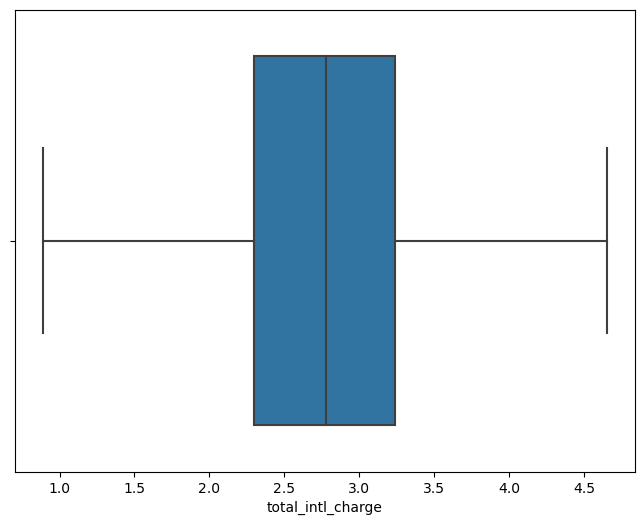

In [92]:


for i in df2.columns:
    plt.figure(figsize=(8, 6))  
    sns.boxplot(x=df[i])


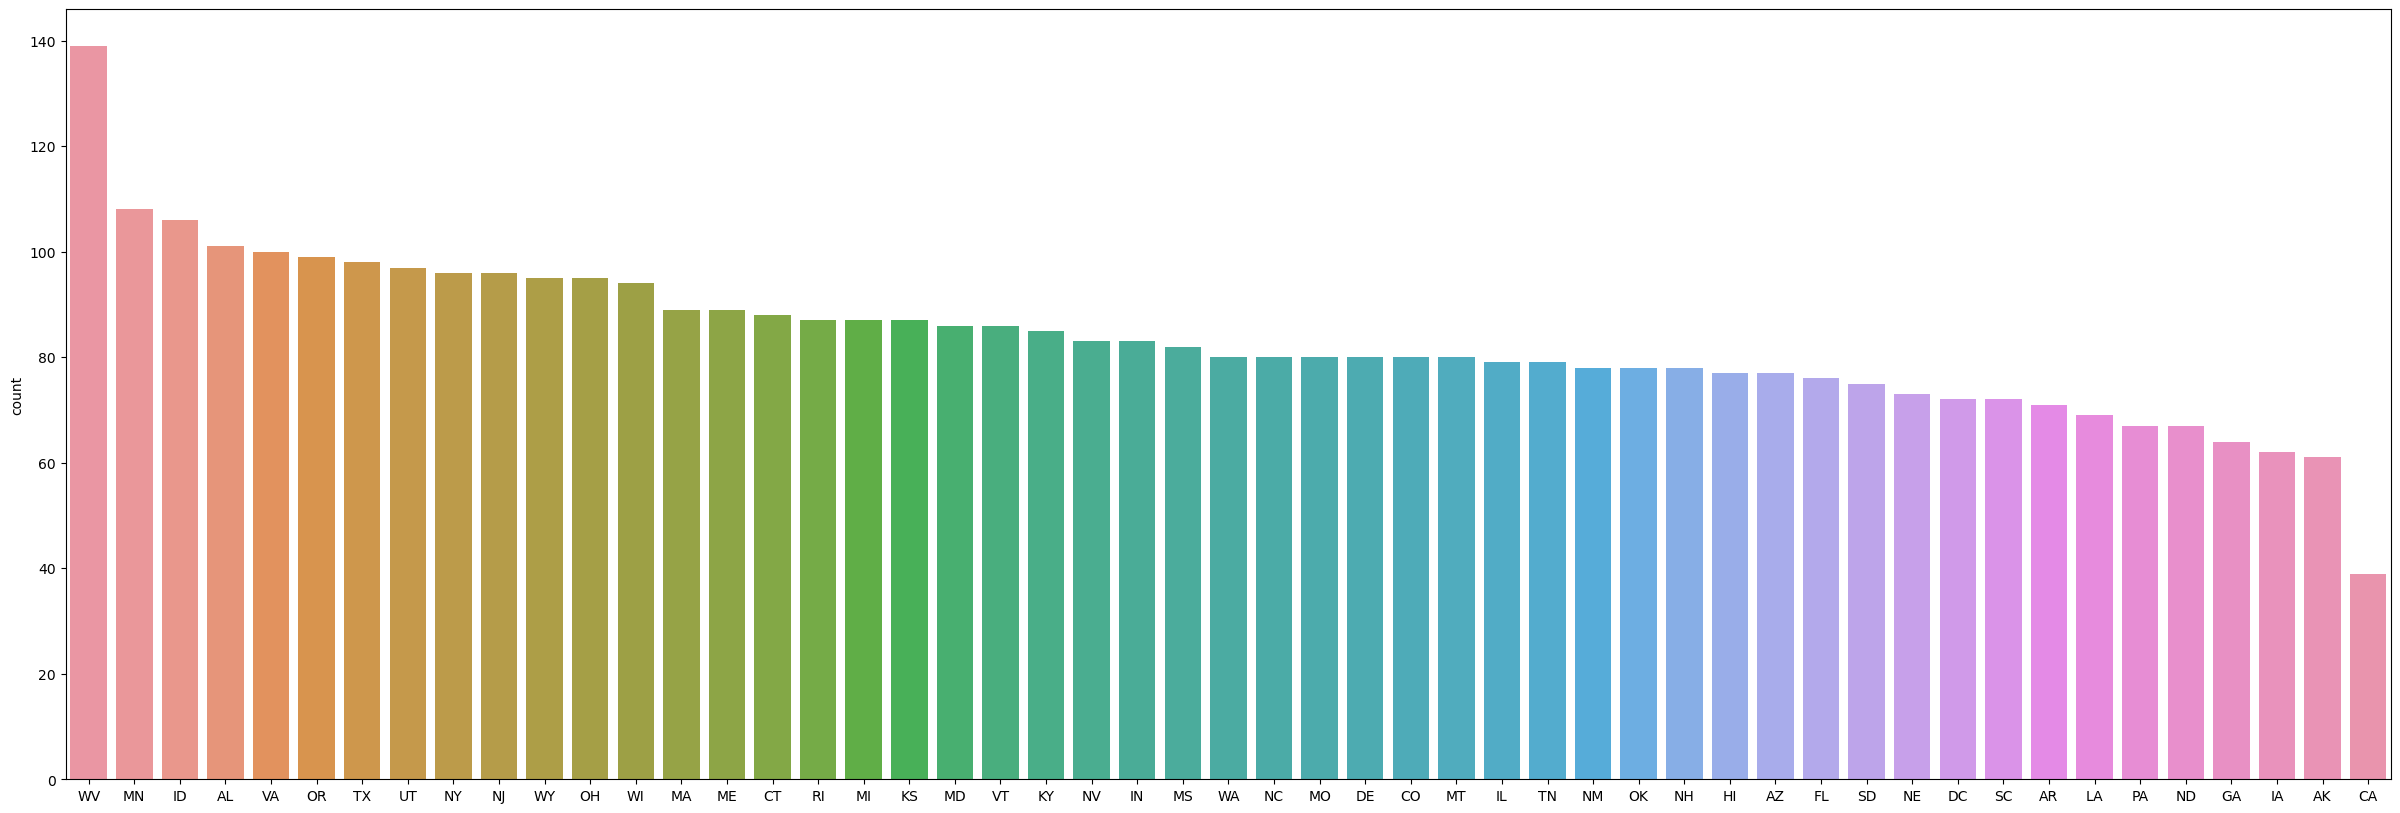

In [93]:
plt.figure(figsize=(30,10))
sns.barplot(x=df["state"].value_counts().index, y=df["state"].value_counts().values)
plt.ylabel("count")
plt.show()

In [94]:
df["state"].unique()

array(['OH', 'NJ', 'OK', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI', 'IA', 'MT',
       'NY', 'ID', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC', 'WY', 'HI', 'NH',
       'AK', 'GA', 'MD', 'AR', 'WI', 'OR', 'MI', 'DE', 'UT', 'CA', 'SD',
       'NC', 'WA', 'MN', 'NM', 'NV', 'DC', 'VT', 'KY', 'ME', 'MS', 'AL',
       'NE', 'KS', 'TN', 'IL', 'PA', 'CT', 'ND'], dtype=object)

In [95]:
df["state"].nunique()

51

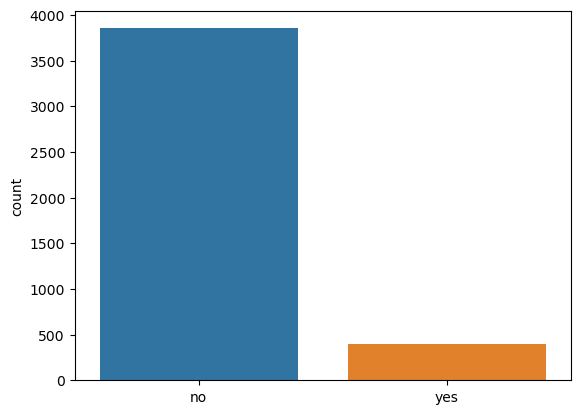

In [96]:

sns.barplot(x=df["international_plan"].value_counts().index, y=df["international_plan"].value_counts().values)
plt.ylabel("count")
plt.show()

In [97]:
df["international_plan"].unique()

array(['no', 'yes'], dtype=object)

In [98]:
df["international_plan"].nunique()

2

In [99]:
#voice mail plan

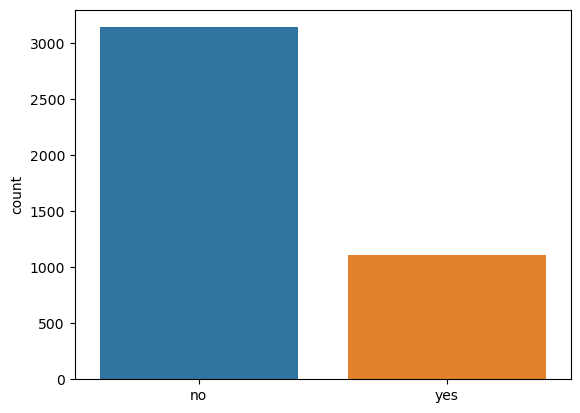

In [100]:

sns.barplot(x=df["voice_mail_plan"].value_counts().index, y=df["voice_mail_plan"].value_counts().values)
plt.ylabel("count")
plt.show()

In [101]:
df["voice_mail_plan"].unique()

array(['yes', 'no'], dtype=object)

In [102]:
df["voice_mail_plan"].nunique()

2

In [103]:
df.head()

state  account_length  area_code international_plan voice_mail_plan  \
0    OH             107      415.0                 no             yes   
1    NJ             137      415.0                 no              no   
2    OH              84      408.0                yes              no   
3    OK              75      415.0                yes              no   
4    MA             121      425.5                 no             yes   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     26              161.6              123   
1                      0              243.4              114   
2                      0              299.4               71   
3                      0              166.7              113   
4                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47             195.50            103.0            16.620   
1             41.38             121.20            110.0            10.300   
2             50.90              64.15             88.0             5.455   
3             28.34             148.30            122.0            12.610   
4             37.09             335.55            108.0            28.515   

   total_night_minutes  total_night_calls  total_night_charge  \
0                254.4              103.0               11.45   
1                162.6              104.0                7.32   
2                196.9               89.0                8.86   
3                186.9              121.0                8.41   
4                212.6              118.0                9.57   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                13.7               3.0               3.70   
1                12.2               5.0               3.29   
2                 6.6               7.0               1.78   
3                10.1               3.0               2.73   
4                 7.5               7.0               2.03   

   number_customer_service_calls churn  
0                              1    no  
1                              0    no  
2                              2    no  
3                              3    no  
4                              3    no

# account length

In [104]:
df["account_length"].describe()

count    4250.000000
mean      100.179529
std        39.530976
min         1.000000
25%        73.000000
50%       100.000000
75%       127.000000
max       208.000000
Name: account_length, dtype: float64

In [105]:
df["account_length"].value_counts()

90     53
87     51
93     50
105    48
100    48
       ..
199     1
187     1
14      1
8       1
202     1
Name: account_length, Length: 203, dtype: int64

In [106]:
df["account_length"].unique()

array([107, 137,  84,  75, 121, 147, 117, 141,  65,  74, 168,  95, 161,
        85,  76,  73,  77, 130, 111, 132,  57,  54,  20,  49,  12,  36,
        78, 136,  98, 135,  34, 160,  64,  59, 142,  97,  52,  60,  10,
        96,  81, 125, 174, 116, 149,  38,  40,  43, 113, 126, 150, 138,
       162,  90,  50,  82, 144,  46,  70, 128,  94, 155,  80,  99, 120,
       108, 122,  93, 157,  63,  41, 193,  61,  92, 163,  91, 127, 110,
       103, 145,  56, 151,  83, 139,   6, 115,  62, 185, 148,  32,  68,
        25, 179,  67,  19, 170, 106,  51, 118, 208, 131,  53, 105,  66,
        35,  88, 123,  45, 100,  22,  33,  86, 114,  24, 119, 101, 146,
       143,  48, 167,  89, 199, 166, 158, 196, 112,  16,  39, 104, 129,
        55,  44,  79, 159, 194,  87,  21, 133, 140,  58, 109,  71,  72,
       124, 102, 165,  18,  30, 190,  47, 152,  26,  69,  31, 186, 171,
        28, 153, 172, 169,  13, 189, 176, 156,  37,  27, 134,  42,  23,
         1, 200,   5, 178, 181, 182, 164, 177,  11,   9, 173, 15

In [107]:
df["account_length"].min()


1

In [108]:
df["account_length"].max()

208

C:\Users\dvlha\AppData\Local\Temp\ipykernel_21748\1701633722.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["account_length"])


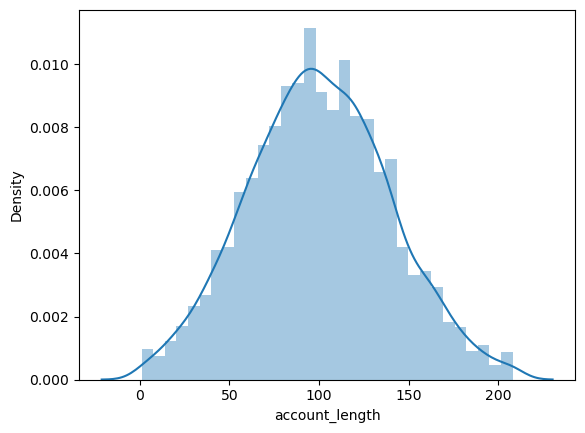

In [109]:
sns.distplot(df["account_length"])
plt.show()

In [110]:
df["account_length"].skew()

0.0903815674638511

# area code

Description of 'area_code' column:
count    4250.000000
mean      415.820235
std         6.265084
min       408.000000
25%       408.000000
50%       415.000000
75%       415.000000
max       425.500000
Name: area_code, dtype: float64
 
*************************************************************
 

Unique values of 'area_code' column:
[415.  408.  425.5]
 
*************************************************************
 
Minimum value of 'area_code' column: 408.0
Maximum value of 'area_code' column: 425.5
 
*************************************************************
 

Distribution of 'area_code' column:


C:\Users\dvlha\AppData\Local\Temp\ipykernel_21748\3030494516.py:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["area_code"])


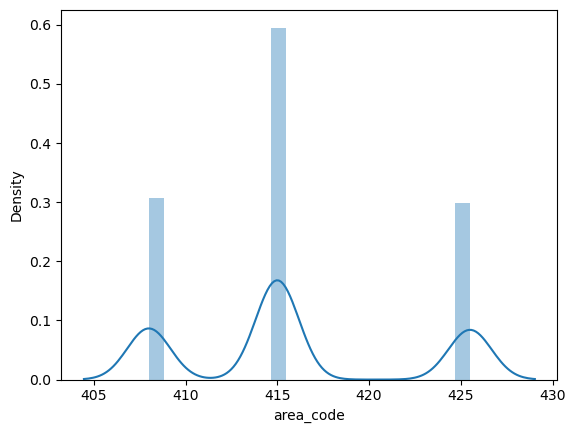

 
*************************************************************
 

Skewness of 'area_code' column: 0.4186321303529638


In [111]:
print("Description of 'area_code' column:")
print(df["area_code"].describe())

print(" ")
print("*************************************************************")
print(" ")



print("\nUnique values of 'area_code' column:")
print(df["area_code"].unique())

print(" ")
print("*************************************************************")
print(" ")

print("Minimum value of 'area_code' column:", df["area_code"].min())
print("Maximum value of 'area_code' column:", df["area_code"].max())

print(" ")
print("*************************************************************")
print(" ")


print("\nDistribution of 'area_code' column:")
sns.distplot(df["area_code"])
plt.show()

print(" ")
print("*************************************************************")
print(" ")


print("\nSkewness of 'area_code' column:", df["area_code"].skew())

<Axes: >

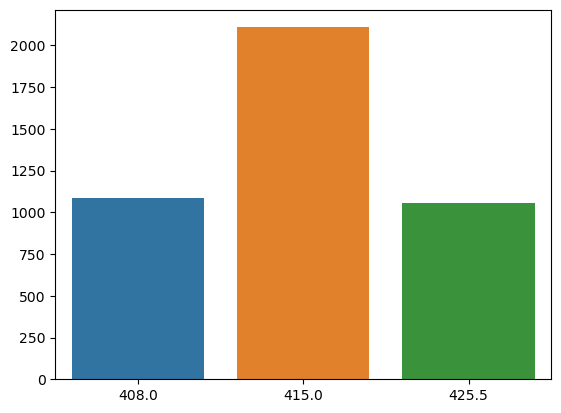

In [112]:

sns.barplot(x=df["area_code"].value_counts().index,y=df["area_code"].value_counts().values)


In [113]:
print("Description of 'number_vmail_messages' column:")
print(df["number_vmail_messages"].describe())



print(" ")
print("*************************************************************")
print(" ")


print("\nUnique values of 'number_vmail_messages' column:")
print(df["number_vmail_messages"].unique())

print(" ")
print("*************************************************************")
print(" ")


print("Minimum value of 'number_vmail_messages' column:", df["number_vmail_messages"].min())
print("Maximum value of 'number_vmail_messages' column:", df["number_vmail_messages"].max())

print(" ")
print("*************************************************************")
print(" ")




Description of 'number_vmail_messages' column:
count    4250.000000
mean        7.554118
std        13.234796
min         0.000000
25%         0.000000
50%         0.000000
75%        16.000000
max        40.000000
Name: number_vmail_messages, dtype: float64
 
*************************************************************
 

Unique values of 'number_vmail_messages' column:
[26  0 24 37 27 33 39 25 30 40 28 34 29 35 21 22 36 23 31 38 32 18 17 16
 20 14 19 15 11 12  8  4 10 13  6]
 
*************************************************************
 
Minimum value of 'number_vmail_messages' column: 0
Maximum value of 'number_vmail_messages' column: 40
 
*************************************************************
 


In [114]:
df["number_vmail_messages"].nunique()

35


Distribution of 'number_vmail_messages' column:


C:\Users\dvlha\AppData\Local\Temp\ipykernel_21748\2883365948.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["number_vmail_messages"])


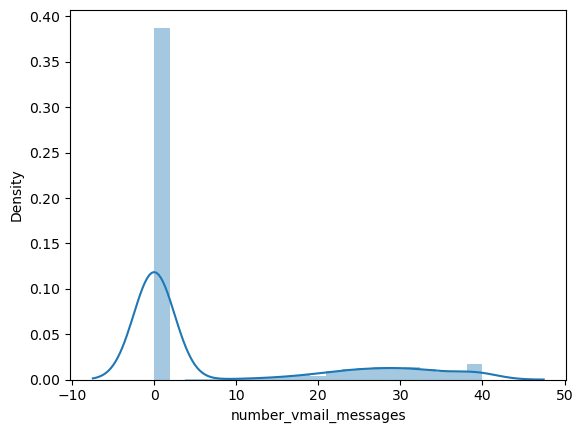

 
*************************************************************
 

Skewness of 'number_vmail_messages' column: 1.3305445280613866


In [115]:
# Plot distribution of "number_vmail_messages" column
print("\nDistribution of 'number_vmail_messages' column:")
sns.distplot(df["number_vmail_messages"])
plt.show()

print(" ")
print("*************************************************************")
print(" ")



# Skewness of "number_vmail_messages" column
print("\nSkewness of 'number_vmail_messages' column:", df["number_vmail_messages"].skew())

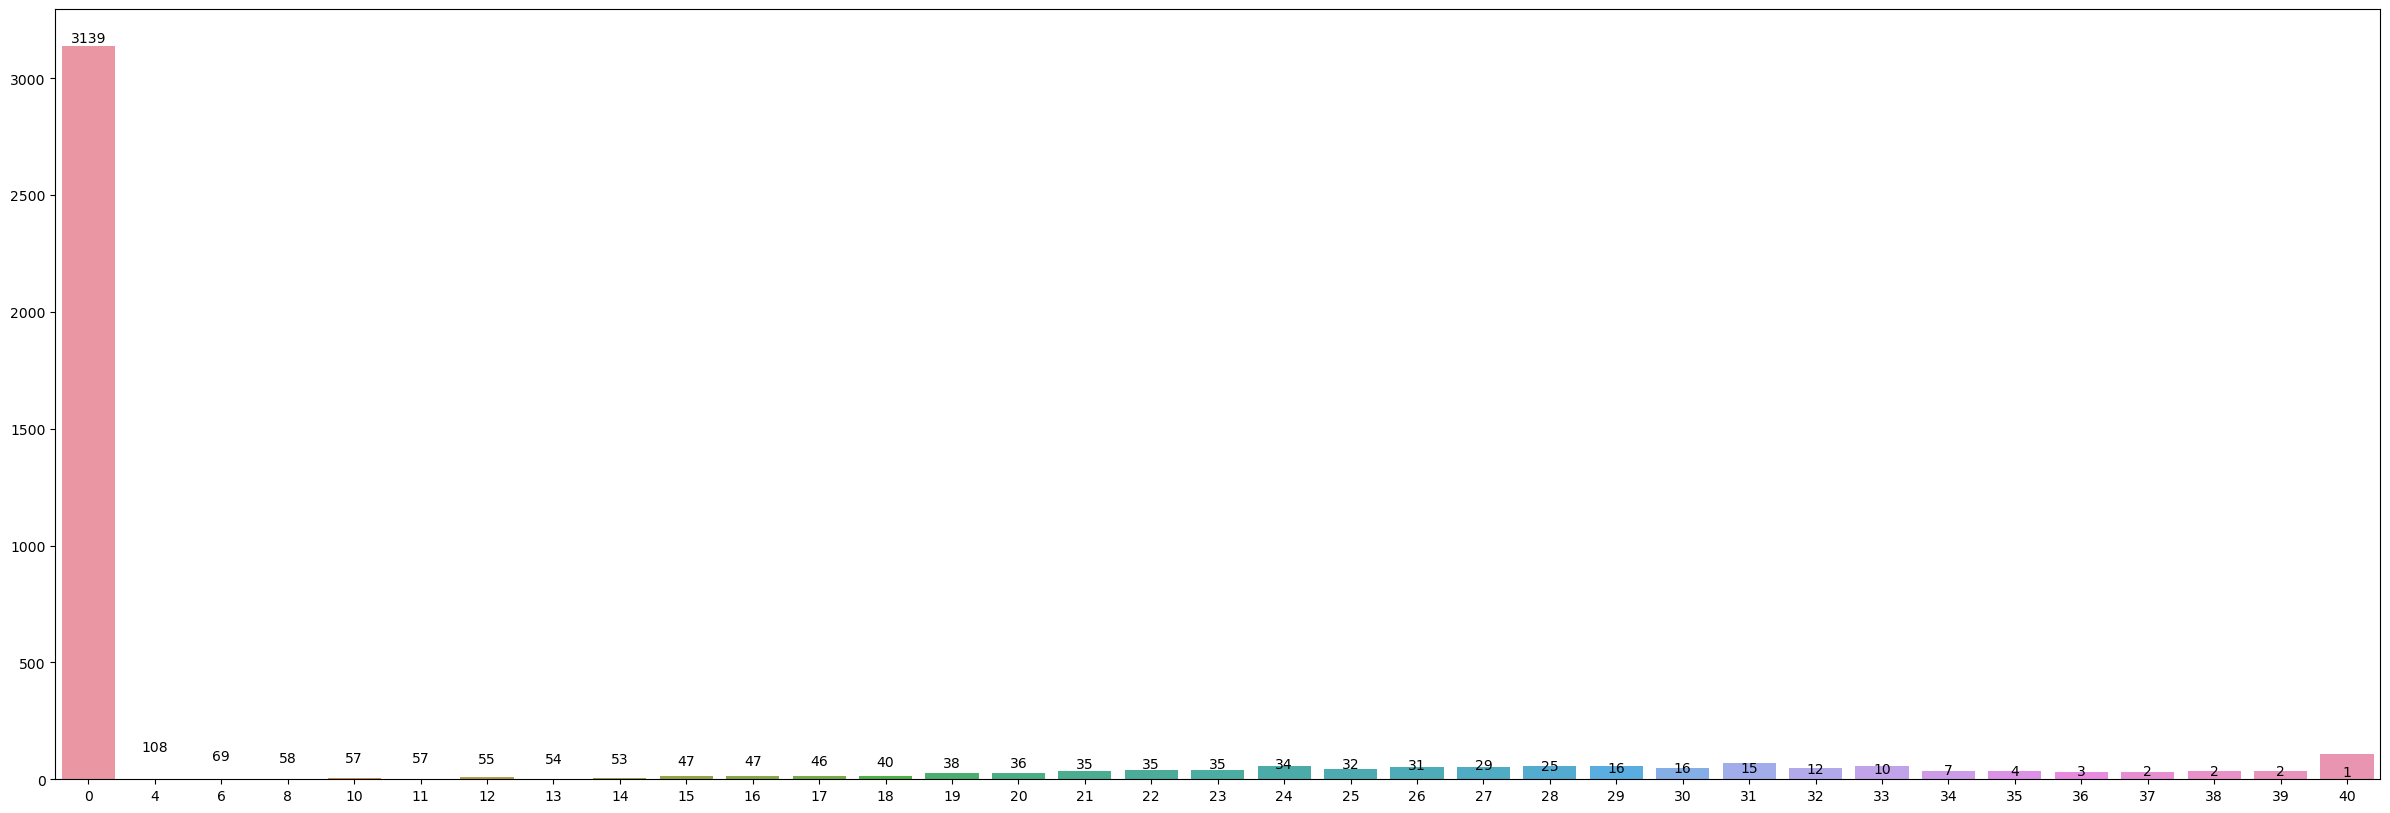

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 10))
sns.barplot(x=df["number_vmail_messages"].value_counts().index, y=df["number_vmail_messages"].value_counts().values)

# Loop through each bar to add text annotations
for index, value in enumerate(df["number_vmail_messages"].value_counts().values):
    plt.text(index, value + 1, str(value), ha='center', va='bottom')

plt.show()


In [117]:
df

state  account_length  area_code international_plan voice_mail_plan  \
0       OH             107      415.0                 no             yes   
1       NJ             137      415.0                 no              no   
2       OH              84      408.0                yes              no   
3       OK              75      415.0                yes              no   
4       MA             121      425.5                 no             yes   
...    ...             ...        ...                ...             ...   
4245    MT              83      415.0                 no              no   
4246    WV              73      408.0                 no              no   
4247    NC              75      408.0                 no              no   
4248    HI              50      408.0                 no             yes   
4249    VT              86      415.0                 no             yes   

      number_vmail_messages  total_day_minutes  total_day_calls  \
0                        26              161.6              123   
1                         0              243.4              114   
2                         0              299.4               71   
3                         0              166.7              113   
4                        24              218.2               88   
...                     ...                ...              ...   
4245                      0              188.3               70   
4246                      0              177.9               89   
4247                      0              170.7              101   
4248                     40              235.7              127   
4249                     34              129.4              102   

      total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0                27.47             195.50            103.0            16.620   
1                41.38             121.20            110.0            10.300   
2                50.90              64.15             88.0             5.455   
3                28.34             148.30            122.0            12.610   
4                37.09             335.55            108.0            28.515   
...                ...                ...              ...               ...   
4245             32.01             243.80             88.0            20.720   
4246             30.24             131.20             82.0            11.150   
4247             29.02             193.10            126.0            16.410   
4248             40.07             223.00            126.0            18.960   
4249             22.00             267.10            104.0            22.700   

      total_night_minutes  total_night_calls  total_night_charge  \
0                   254.4              103.0               11.45   
1                   162.6              104.0                7.32   
2                   196.9               89.0                8.86   
3                   186.9              121.0                8.41   
4                   212.6              118.0                9.57   
...                   ...                ...                 ...   
4245                213.7               79.0                9.62   
4246                186.2               89.0                8.38   
4247                129.1              104.0                5.81   
4248                297.5              116.0               13.39   
4249                154.8              100.0                6.97   

      total_intl_minutes  total_intl_calls  total_intl_charge  \
0                   13.7               3.0               3.70   
1                   12.2               5.0               3.29   
2                    6.6               7.0               1.78   
3                   10.1               3.0               2.73   
4                    7.5               7.0               2.03   
...                  ...               ...                ...   
4245                10.3               6.0            

In [118]:

# Describe the "total_day_minutes" column
print("Description of 'total_day_minutes' column:")
print(df["total_day_minutes"].describe())

print("\n*************************************************************\n")

# Unique values of 'total_day_minutes' column
print("Unique values of 'total_day_minutes' column:")
print(df["total_day_minutes"].unique())

print("\n*************************************************************\n")

# Minimum and maximum values of 'total_day_minutes' column
print("Minimum value of 'total_day_minutes' column:", df["total_day_minutes"].min())
print("Maximum value of 'total_day_minutes' column:", df["total_day_minutes"].max())

print("\n*************************************************************\n")

# Number of unique values in 'total_day_minutes' column
print("Number of unique values in 'total_day_minutes' column:", df["total_day_minutes"].nunique())



Description of 'total_day_minutes' column:
count    4250.000000
mean      180.281979
std        53.763629
min        34.012500
25%       143.325000
50%       180.450000
75%       216.200000
max       325.512500
Name: total_day_minutes, dtype: float64

*************************************************************

Unique values of 'total_day_minutes' column:
[161.6 243.4 299.4 ... 170.3 188.7 170. ]

*************************************************************

Minimum value of 'total_day_minutes' column: 34.01250000000006
Maximum value of 'total_day_minutes' column: 325.51249999999993

*************************************************************

Number of unique values in 'total_day_minutes' column: 1821



Distribution of 'total_day_minutes' column:


C:\Users\dvlha\AppData\Local\Temp\ipykernel_21748\4230919357.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["total_day_minutes"])


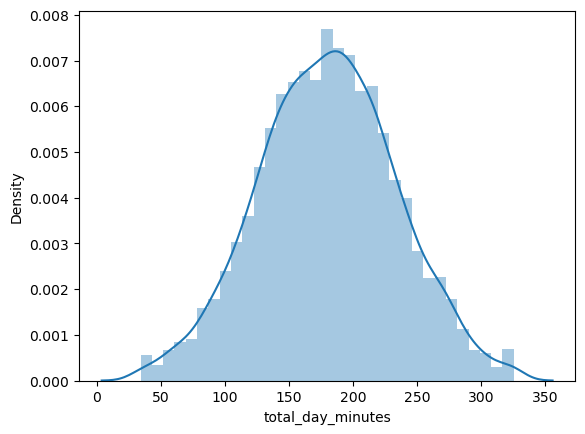


*************************************************************

Skewness of 'total_day_minutes' column: 0.004156000737911351


In [119]:
# Plot distribution of "total_day_minutes" column
print("\nDistribution of 'total_day_minutes' column:")
sns.distplot(df["total_day_minutes"])
plt.show()

print("\n*************************************************************\n")

# Skewness of "total_day_minutes" column
print("Skewness of 'total_day_minutes' column:", df["total_day_minutes"].skew())


Description of 'total_day_calls' column:
count    4250.000000
mean       99.940235
std        19.649367
min        48.000000
25%        87.000000
50%       100.000000
75%       113.000000
max       152.000000
Name: total_day_calls, dtype: float64

*************************************************************

Unique values of 'total_day_calls' column:
[123 114  71 113  88  79  97  84 137 127  96  67 139  66  90 117  89 112
 103  86 115  73 109 105 118  94 128  64 106 102  85  82  77 120 133 135
 108  57  98 129  83  92  74  93  70 101 146  72  99 104 125  61 100 110
  87 131  65 124 119  52  68 107  48 121 116 126  91 122 111 145  76  95
  80  78 140 148  81  55  69 136 152 134 130  63  53 141  75  59 132 138
  54 151  62 144 147 150  56  58  51  60 143 142  49  50]

*************************************************************

Minimum value of 'total_day_calls' column: 48
Maximum value of 'total_day_calls' column: 152

*************************************************************

Nu

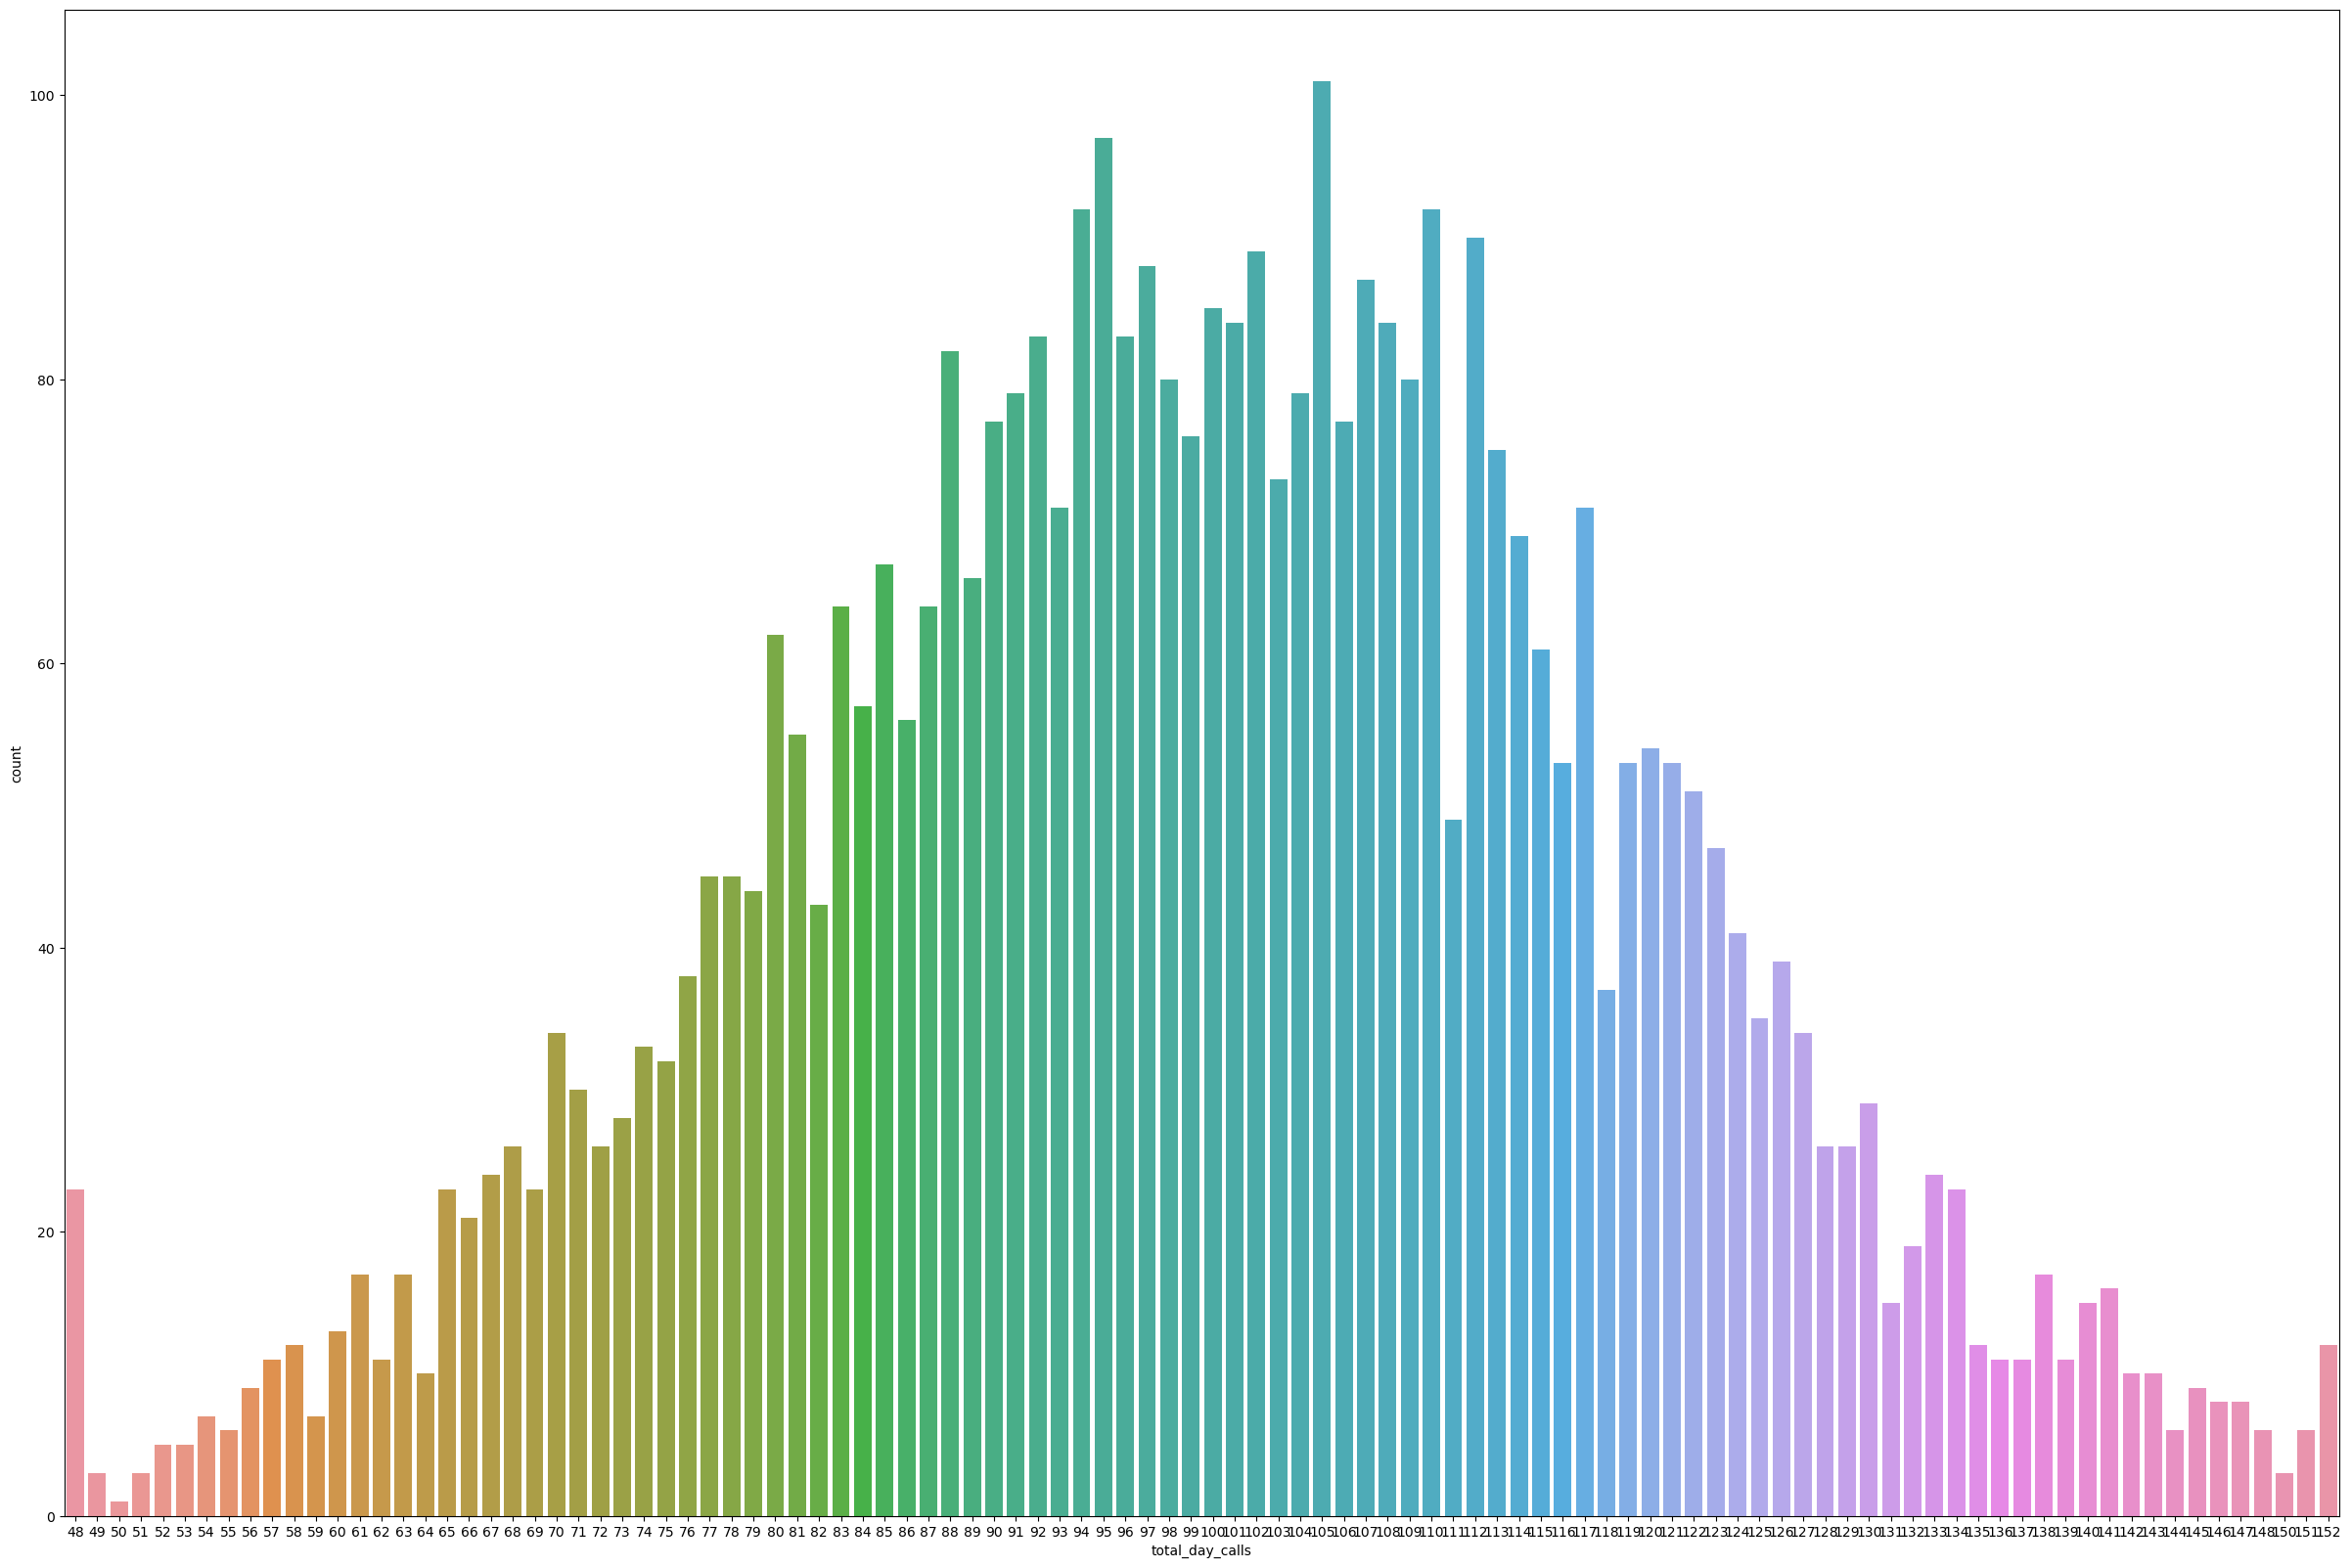


*************************************************************



In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

# Describe the "total_day_calls" column
print("Description of 'total_day_calls' column:")
print(df["total_day_calls"].describe())

print("\n*************************************************************\n")

# Unique values of 'total_day_calls' column
print("Unique values of 'total_day_calls' column:")
print(df["total_day_calls"].unique())

print("\n*************************************************************\n")

# Minimum and maximum values of 'total_day_calls' column
print("Minimum value of 'total_day_calls' column:", df["total_day_calls"].min())
print("Maximum value of 'total_day_calls' column:", df["total_day_calls"].max())

print("\n*************************************************************\n")

# Number of unique values in 'total_day_calls' column
print("Number of unique values in 'total_day_calls' column:", df["total_day_calls"].nunique())

# Plot count of occurrences of "total_day_calls" column
print("\nCount of occurrences of 'total_day_calls' column:")
plt.figure(figsize=(30,20))
sns.countplot(x=df["total_day_calls"])
plt.show()

print("\n*************************************************************\n")


In [121]:


# Describe the "total_day_charge" column
print("Description of 'total_day_charge' column:")
print(df["total_day_charge"].describe())

print("\n*************************************************************\n")

# Unique values of 'total_day_charge' column
print("Unique values of 'total_day_charge' column:")
print(df["total_day_charge"].unique())

print("\n*************************************************************\n")

# Minimum and maximum values of 'total_day_charge' column
print("Minimum value of 'total_day_charge' column:", df["total_day_charge"].min())
print("Maximum value of 'total_day_charge' column:", df["total_day_charge"].max())

print("\n*************************************************************\n")

# Number of unique values in 'total_day_charge' column
print("Number of unique values in 'total_day_charge' column:", df["total_day_charge"].nunique())



Description of 'total_day_charge' column:
count    4250.000000
mean       30.648467
std         9.139651
min         5.787500
25%        24.365000
50%        30.680000
75%        36.750000
max        55.327500
Name: total_day_charge, dtype: float64

*************************************************************

Unique values of 'total_day_charge' column:
[27.47 41.38 50.9  ... 28.95 32.08 28.9 ]

*************************************************************

Minimum value of 'total_day_charge' column: 5.787499999999998
Maximum value of 'total_day_charge' column: 55.3275

*************************************************************

Number of unique values in 'total_day_charge' column: 1820



Distribution of 'total_day_charge' column:


C:\Users\dvlha\AppData\Local\Temp\ipykernel_21748\1372504115.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["total_day_charge"])


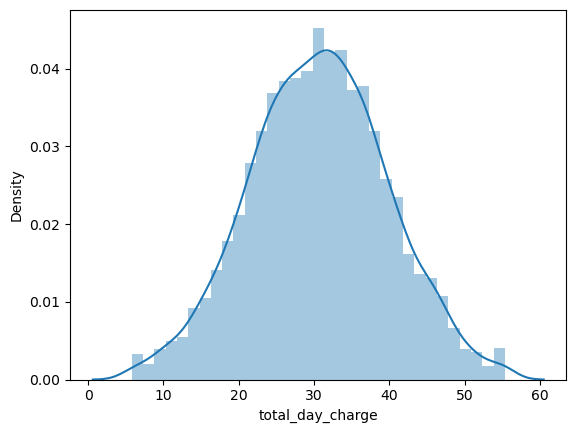


*************************************************************

Skewness of 'total_day_charge' column: 0.004114812104929908


In [122]:
# Plot distribution of "total_day_charge" column
print("\nDistribution of 'total_day_charge' column:")
sns.distplot(df["total_day_charge"])
plt.show()

print("\n*************************************************************\n")

# Skewness of "total_day_charge" column
print("Skewness of 'total_day_charge' column:", df["total_day_charge"].skew())


In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

# Describe the "total_eve_minutes" column
print("Description of 'total_eve_minutes' column:")
print(df["total_eve_minutes"].describe())

print("\n*************************************************************\n")

# Unique values of 'total_eve_minutes' column
print("Unique values of 'total_eve_minutes' column:")
print(df["total_eve_minutes"].unique())

print("\n*************************************************************\n")

# Minimum and maximum values of 'total_eve_minutes' column
print("Minimum value of 'total_eve_minutes' column:", df["total_eve_minutes"].min())
print("Maximum value of 'total_eve_minutes' column:", df["total_eve_minutes"].max())

print("\n*************************************************************\n")

# Number of unique values in 'total_eve_minutes' column
print("Number of unique values in 'total_eve_minutes' column:", df["total_eve_minutes"].nunique())



Description of 'total_eve_minutes' column:
count    4250.000000
mean      200.217200
std        49.927189
min        64.150000
25%       165.925000
50%       200.700000
75%       233.775000
max       335.550000
Name: total_eve_minutes, dtype: float64

*************************************************************

Unique values of 'total_eve_minutes' column:
[195.5  121.2   64.15 ... 264.6  276.6  280.6 ]

*************************************************************

Minimum value of 'total_eve_minutes' column: 64.15000000000002
Maximum value of 'total_eve_minutes' column: 335.55

*************************************************************

Number of unique values in 'total_eve_minutes' column: 1741



Distribution of 'total_eve_minutes' column:


C:\Users\dvlha\AppData\Local\Temp\ipykernel_21748\4201429537.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["total_eve_minutes"])


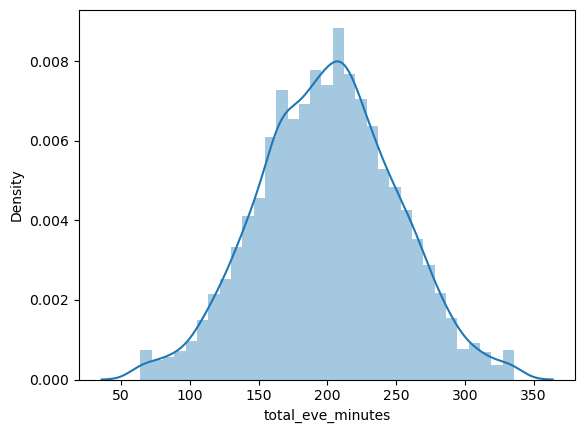


*************************************************************

Skewness of 'total_eve_minutes' column: -0.0074685299745575135


In [124]:
# Plot distribution of "total_eve_minutes" column
print("\nDistribution of 'total_eve_minutes' column:")
sns.distplot(df["total_eve_minutes"])
plt.show()

print("\n*************************************************************\n")

# Skewness of "total_eve_minutes" column
print("Skewness of 'total_eve_minutes' column:", df["total_eve_minutes"].skew())



Description of 'total_eve_calls' column:
count    4250.000000
mean      100.190118
std        19.776787
min        46.500000
25%        87.000000
50%       100.000000
75%       114.000000
max       154.500000
Name: total_eve_calls, dtype: float64

*************************************************************

Unique values of 'total_eve_calls' column:
[103.  110.   88.  122.  108.   94.   80.  111.   83.  148.   71.   75.
  97.   90.   65.   93.  121.   99.  102.   72.  112.  100.   84.  109.
 107.  119.  116.   85.   98.  118.   92.   74.   58.   96.  115.   66.
  67.   62.   77.  126.  142.   64.  104.  117.   79.   86.  101.   76.
 105.   81.  106.  113.   59.   48.   95.   87.  123.  114.  140.  128.
  60.  125.   91.   46.5 138.  129.  133.  136.   57.  135.  139.   51.
  70.   89.   82.   78.   63.  134.   73.  152.  154.5 120.   69.  127.
 132.  137.  143.   68.  124.   54.  131.   52.   61.   56.  130.  146.
  55.  147.   50.  144.   53.  141.  153.  154.  149.  151.  150.  145

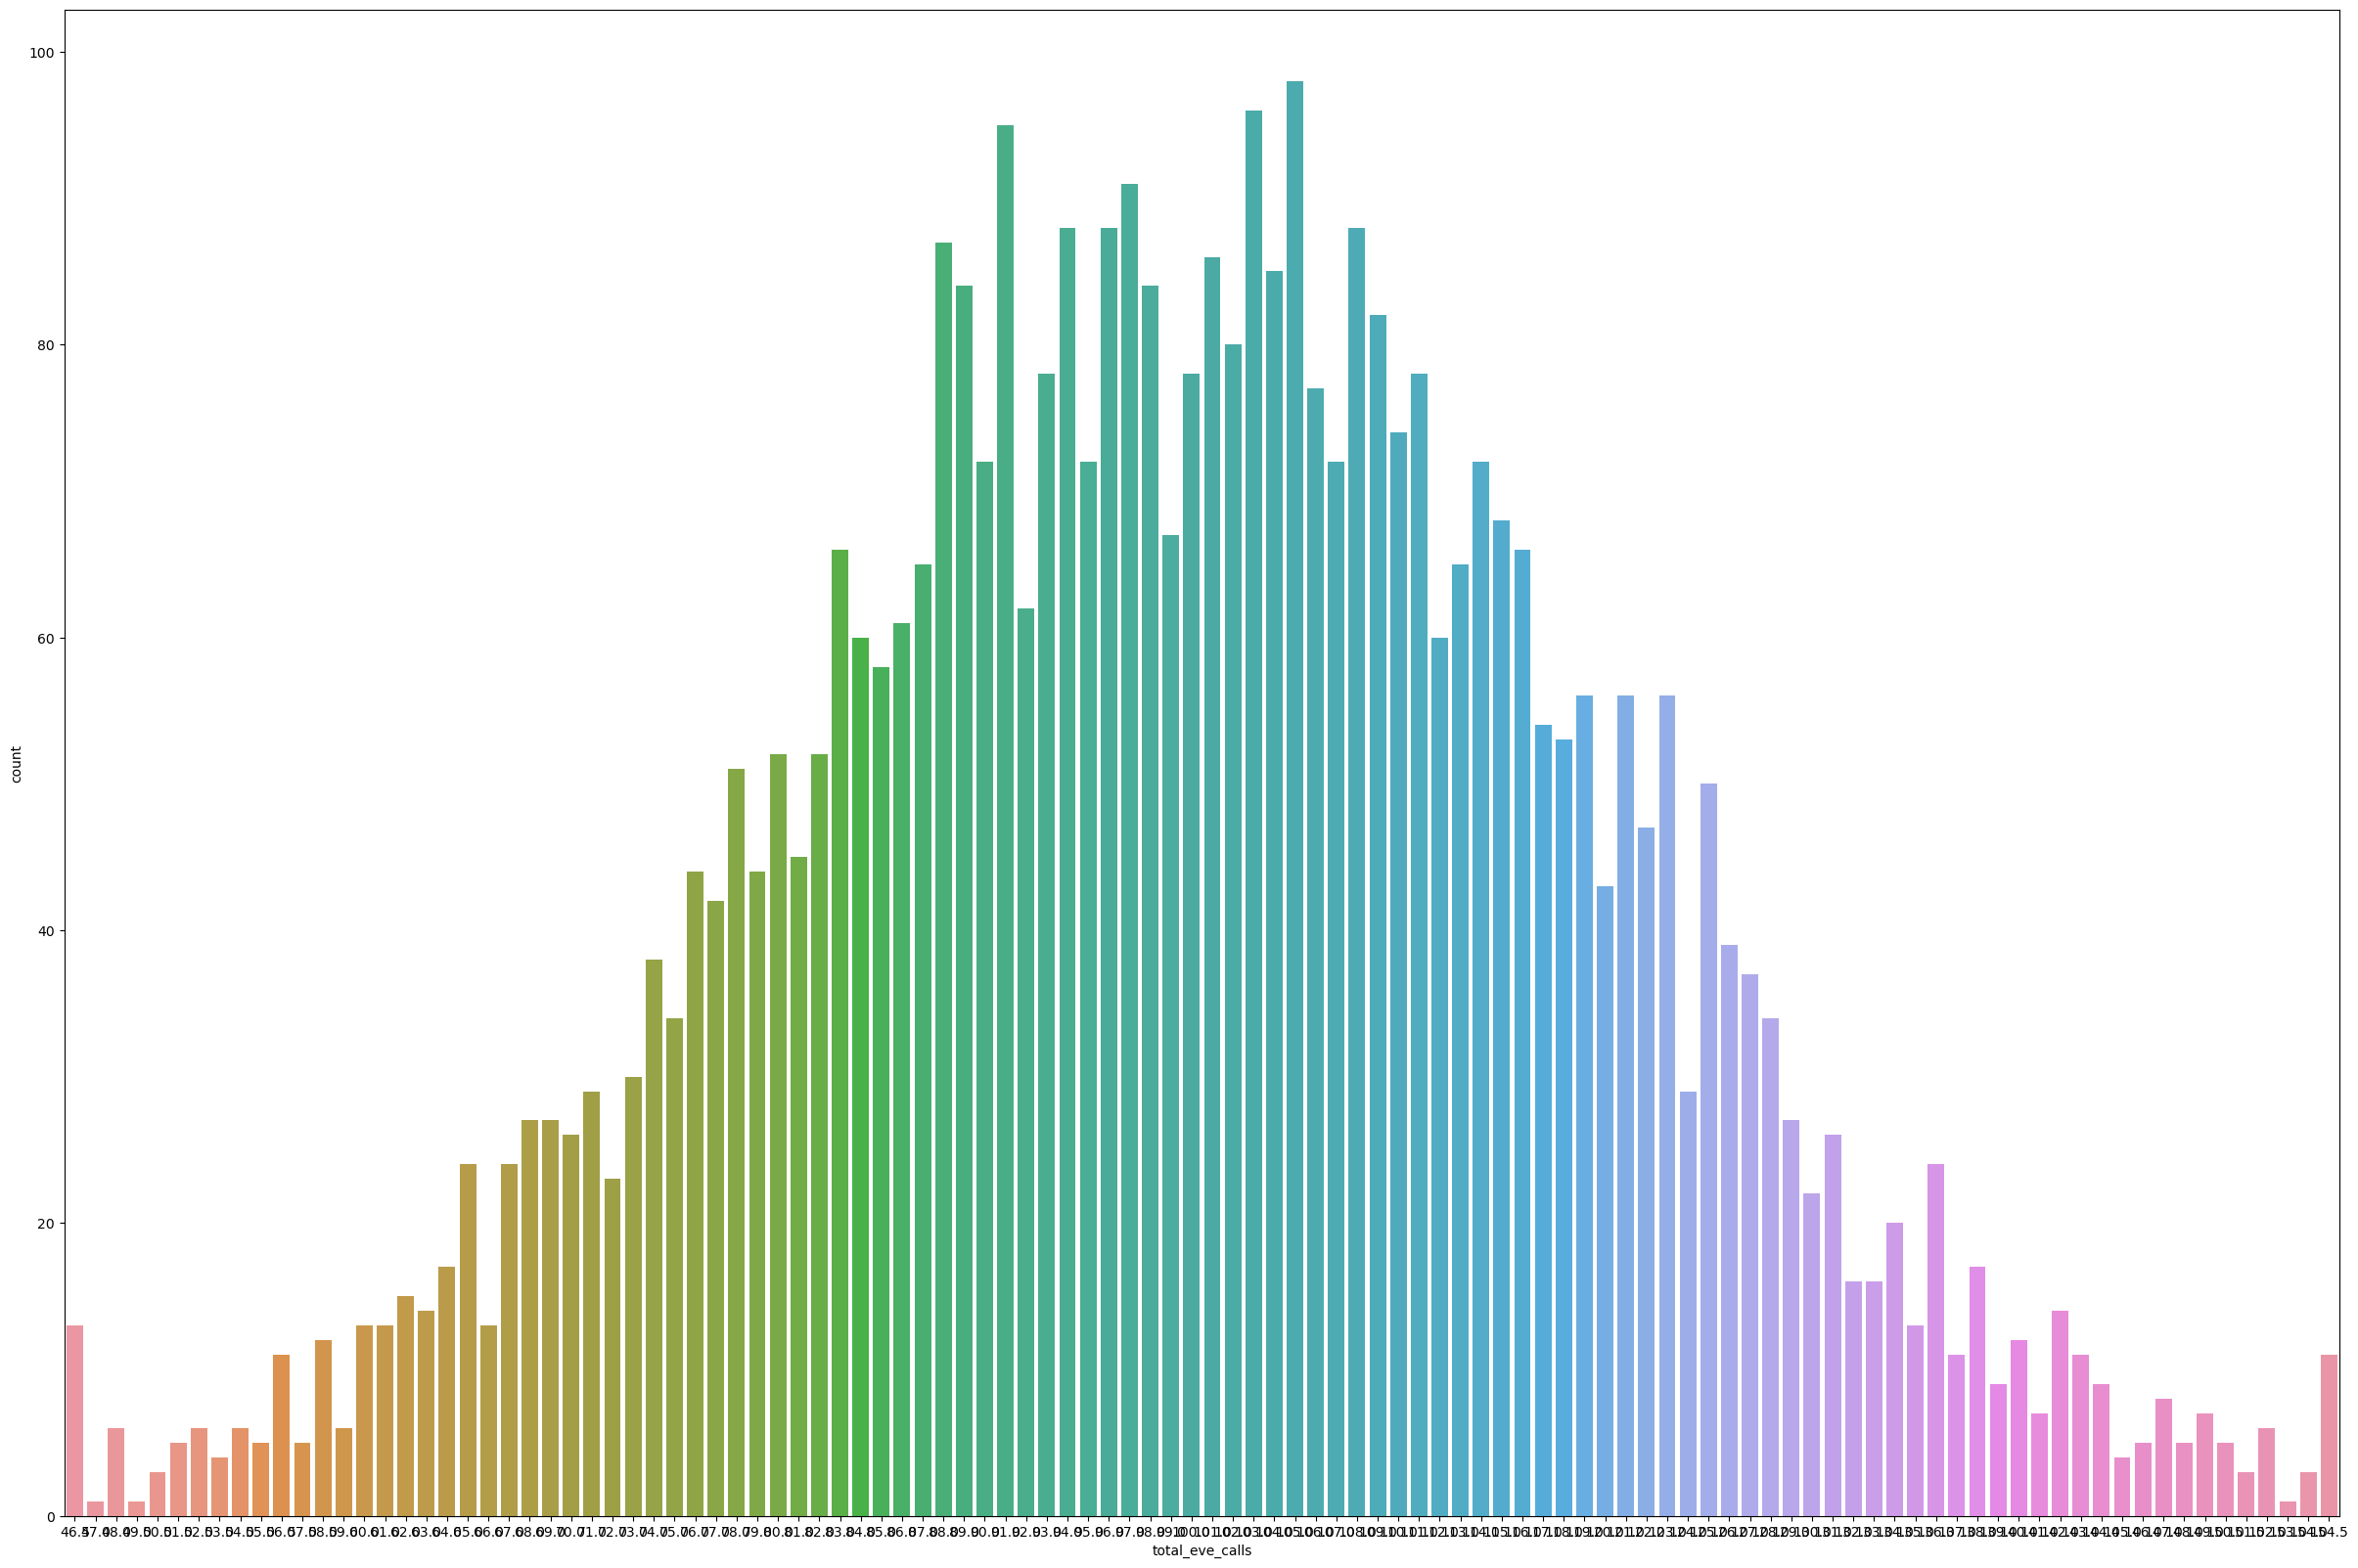


*************************************************************



In [125]:


# Describe the "total_eve_calls" column
print("Description of 'total_eve_calls' column:")
print(df["total_eve_calls"].describe())

print("\n*************************************************************\n")

# Unique values of 'total_eve_calls' column
print("Unique values of 'total_eve_calls' column:")
print(df["total_eve_calls"].unique())

print("\n*************************************************************\n")

# Minimum and maximum values of 'total_eve_calls' column
print("Minimum value of 'total_eve_calls' column:", df["total_eve_calls"].min())
print("Maximum value of 'total_eve_calls' column:", df["total_eve_calls"].max())

print("\n*************************************************************\n")

# Number of unique values in 'total_eve_calls' column
print("Number of unique values in 'total_eve_calls' column:", df["total_eve_calls"].nunique())

# Plot count of occurrences of "total_eve_calls" column
print("\nCount of occurrences of 'total_eve_calls' column:")
plt.figure(figsize=(30,20))
sns.countplot(x=df["total_eve_calls"])
plt.show()

print("\n*************************************************************\n")



In [126]:
# Describe the "total_eve_charge" column
print("\nDescription of 'total_eve_charge' column:")
print(df["total_eve_charge"].describe())

print("\n*************************************************************\n")

# Unique values of 'total_eve_charge' column
print("Unique values of 'total_eve_charge' column:")
print(df["total_eve_charge"].unique())

print("\n*************************************************************\n")

# Minimum and maximum values of 'total_eve_charge' column
print("Minimum value of 'total_eve_charge' column:", df["total_eve_charge"].min())
print("Maximum value of 'total_eve_charge' column:", df["total_eve_charge"].max())

print("\n*************************************************************\n")

# Number of unique values in 'total_eve_charge' column
print("Number of unique values in 'total_eve_charge' column:", df["total_eve_charge"].nunique())




Description of 'total_eve_charge' column:
count    4250.000000
mean       17.018678
std         4.243726
min         5.455000
25%        14.102500
50%        17.060000
75%        19.867500
max        28.515000
Name: total_eve_charge, dtype: float64

*************************************************************

Unique values of 'total_eve_charge' column:
[16.62  10.3    5.455 ... 22.49  23.51  23.85 ]

*************************************************************

Minimum value of 'total_eve_charge' column: 5.454999999999998
Maximum value of 'total_eve_charge' column: 28.515

*************************************************************

Number of unique values in 'total_eve_charge' column: 1540



Distribution of 'total_eve_charge' column:


C:\Users\dvlha\AppData\Local\Temp\ipykernel_21748\2412816542.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["total_eve_charge"])


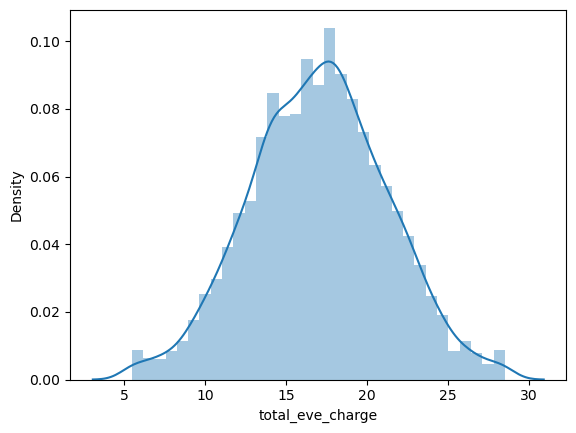


*************************************************************

Skewness of 'total_eve_charge' column: -0.007504510722633134


In [127]:
# Plot distribution of "total_eve_charge" column
print("\nDistribution of 'total_eve_charge' column:")
sns.distplot(df["total_eve_charge"])
plt.show()

print("\n*************************************************************\n")

# Skewness of "total_eve_charge" column
print("Skewness of 'total_eve_charge' column:", df["total_eve_charge"].skew())


Description of 'total_night_minutes' column:
count    4250.000000
mean      200.504556
std        49.861498
min        66.012500
25%       167.225000
50%       200.450000
75%       234.700000
max       335.912500
Name: total_night_minutes, dtype: float64

*************************************************************

Unique values of 'total_night_minutes' column:
[254.4 162.6 196.9 ... 162.   75.1 297.5]

*************************************************************

Minimum value of 'total_night_minutes' column: 66.0125
Maximum value of 'total_night_minutes' column: 335.91249999999997

*************************************************************

Number of unique values in 'total_night_minutes' column: 1723

Distribution of 'total_night_minutes' column:


C:\Users\dvlha\AppData\Local\Temp\ipykernel_21748\1338429834.py:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["total_night_minutes"])


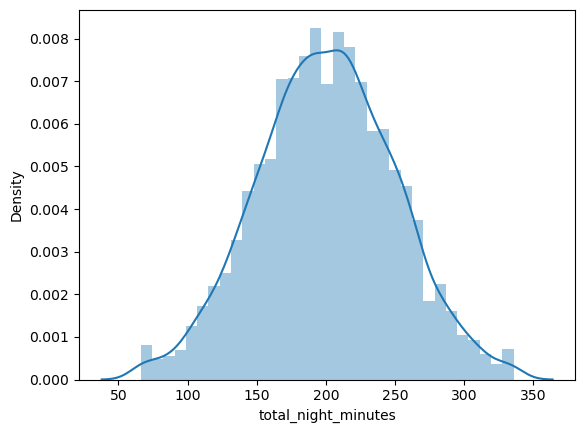


*************************************************************

Skewness of 'total_night_minutes' column: -0.004403085649445751


In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

# Describe the "total_night_minutes" column
print("Description of 'total_night_minutes' column:")
print(df["total_night_minutes"].describe())

print("\n*************************************************************\n")

# Unique values of 'total_night_minutes' column
print("Unique values of 'total_night_minutes' column:")
print(df["total_night_minutes"].unique())

print("\n*************************************************************\n")

# Minimum and maximum values of 'total_night_minutes' column
print("Minimum value of 'total_night_minutes' column:", df["total_night_minutes"].min())
print("Maximum value of 'total_night_minutes' column:", df["total_night_minutes"].max())

print("\n*************************************************************\n")

# Number of unique values in 'total_night_minutes' column
print("Number of unique values in 'total_night_minutes' column:", df["total_night_minutes"].nunique())

# Plot distribution of "total_night_minutes" column
print("\nDistribution of 'total_night_minutes' column:")
sns.distplot(df["total_night_minutes"])
plt.show()

print("\n*************************************************************\n")

# Skewness of "total_night_minutes" column
print("Skewness of 'total_night_minutes' column:", df["total_night_minutes"].skew())



Description of 'total_night_calls' column:
count    4250.000000
mean       99.838941
std        19.929176
min        45.500000
25%        86.000000
50%       100.000000
75%       113.000000
max       153.500000
Name: total_night_calls, dtype: float64

*************************************************************

Unique values of 'total_night_calls' column:
[103.  104.   89.  121.  118.   96.   90.   97.  111.   94.  128.  115.
  75.  108.   74.  133.   64.   78.  105.   68.  102.   98.  116.  109.
 107.  135.   92.   86.  127.   79.   87.  129.   57.   77.   95.   54.
 106.   53.   67.  139.   60.  100.   61.   99.   73.  113.   76.  119.
  84.   62.   91.   72.  114.   88.  126.  122.  123.  117.   82.   80.
 120.  130.   71.   59.  112.  132.  142.  101.  150.   69.  131.  110.
  83.   93.  124.  136.  125.   81.   66.  143.   58.   55.   85.   70.
  46.   45.5 152.   50.  153.   49.  153.5  63.  138.  134.  140.  141.
 146.   65.   51.  151.  137.  147.  145.  148.  144.  149.   56

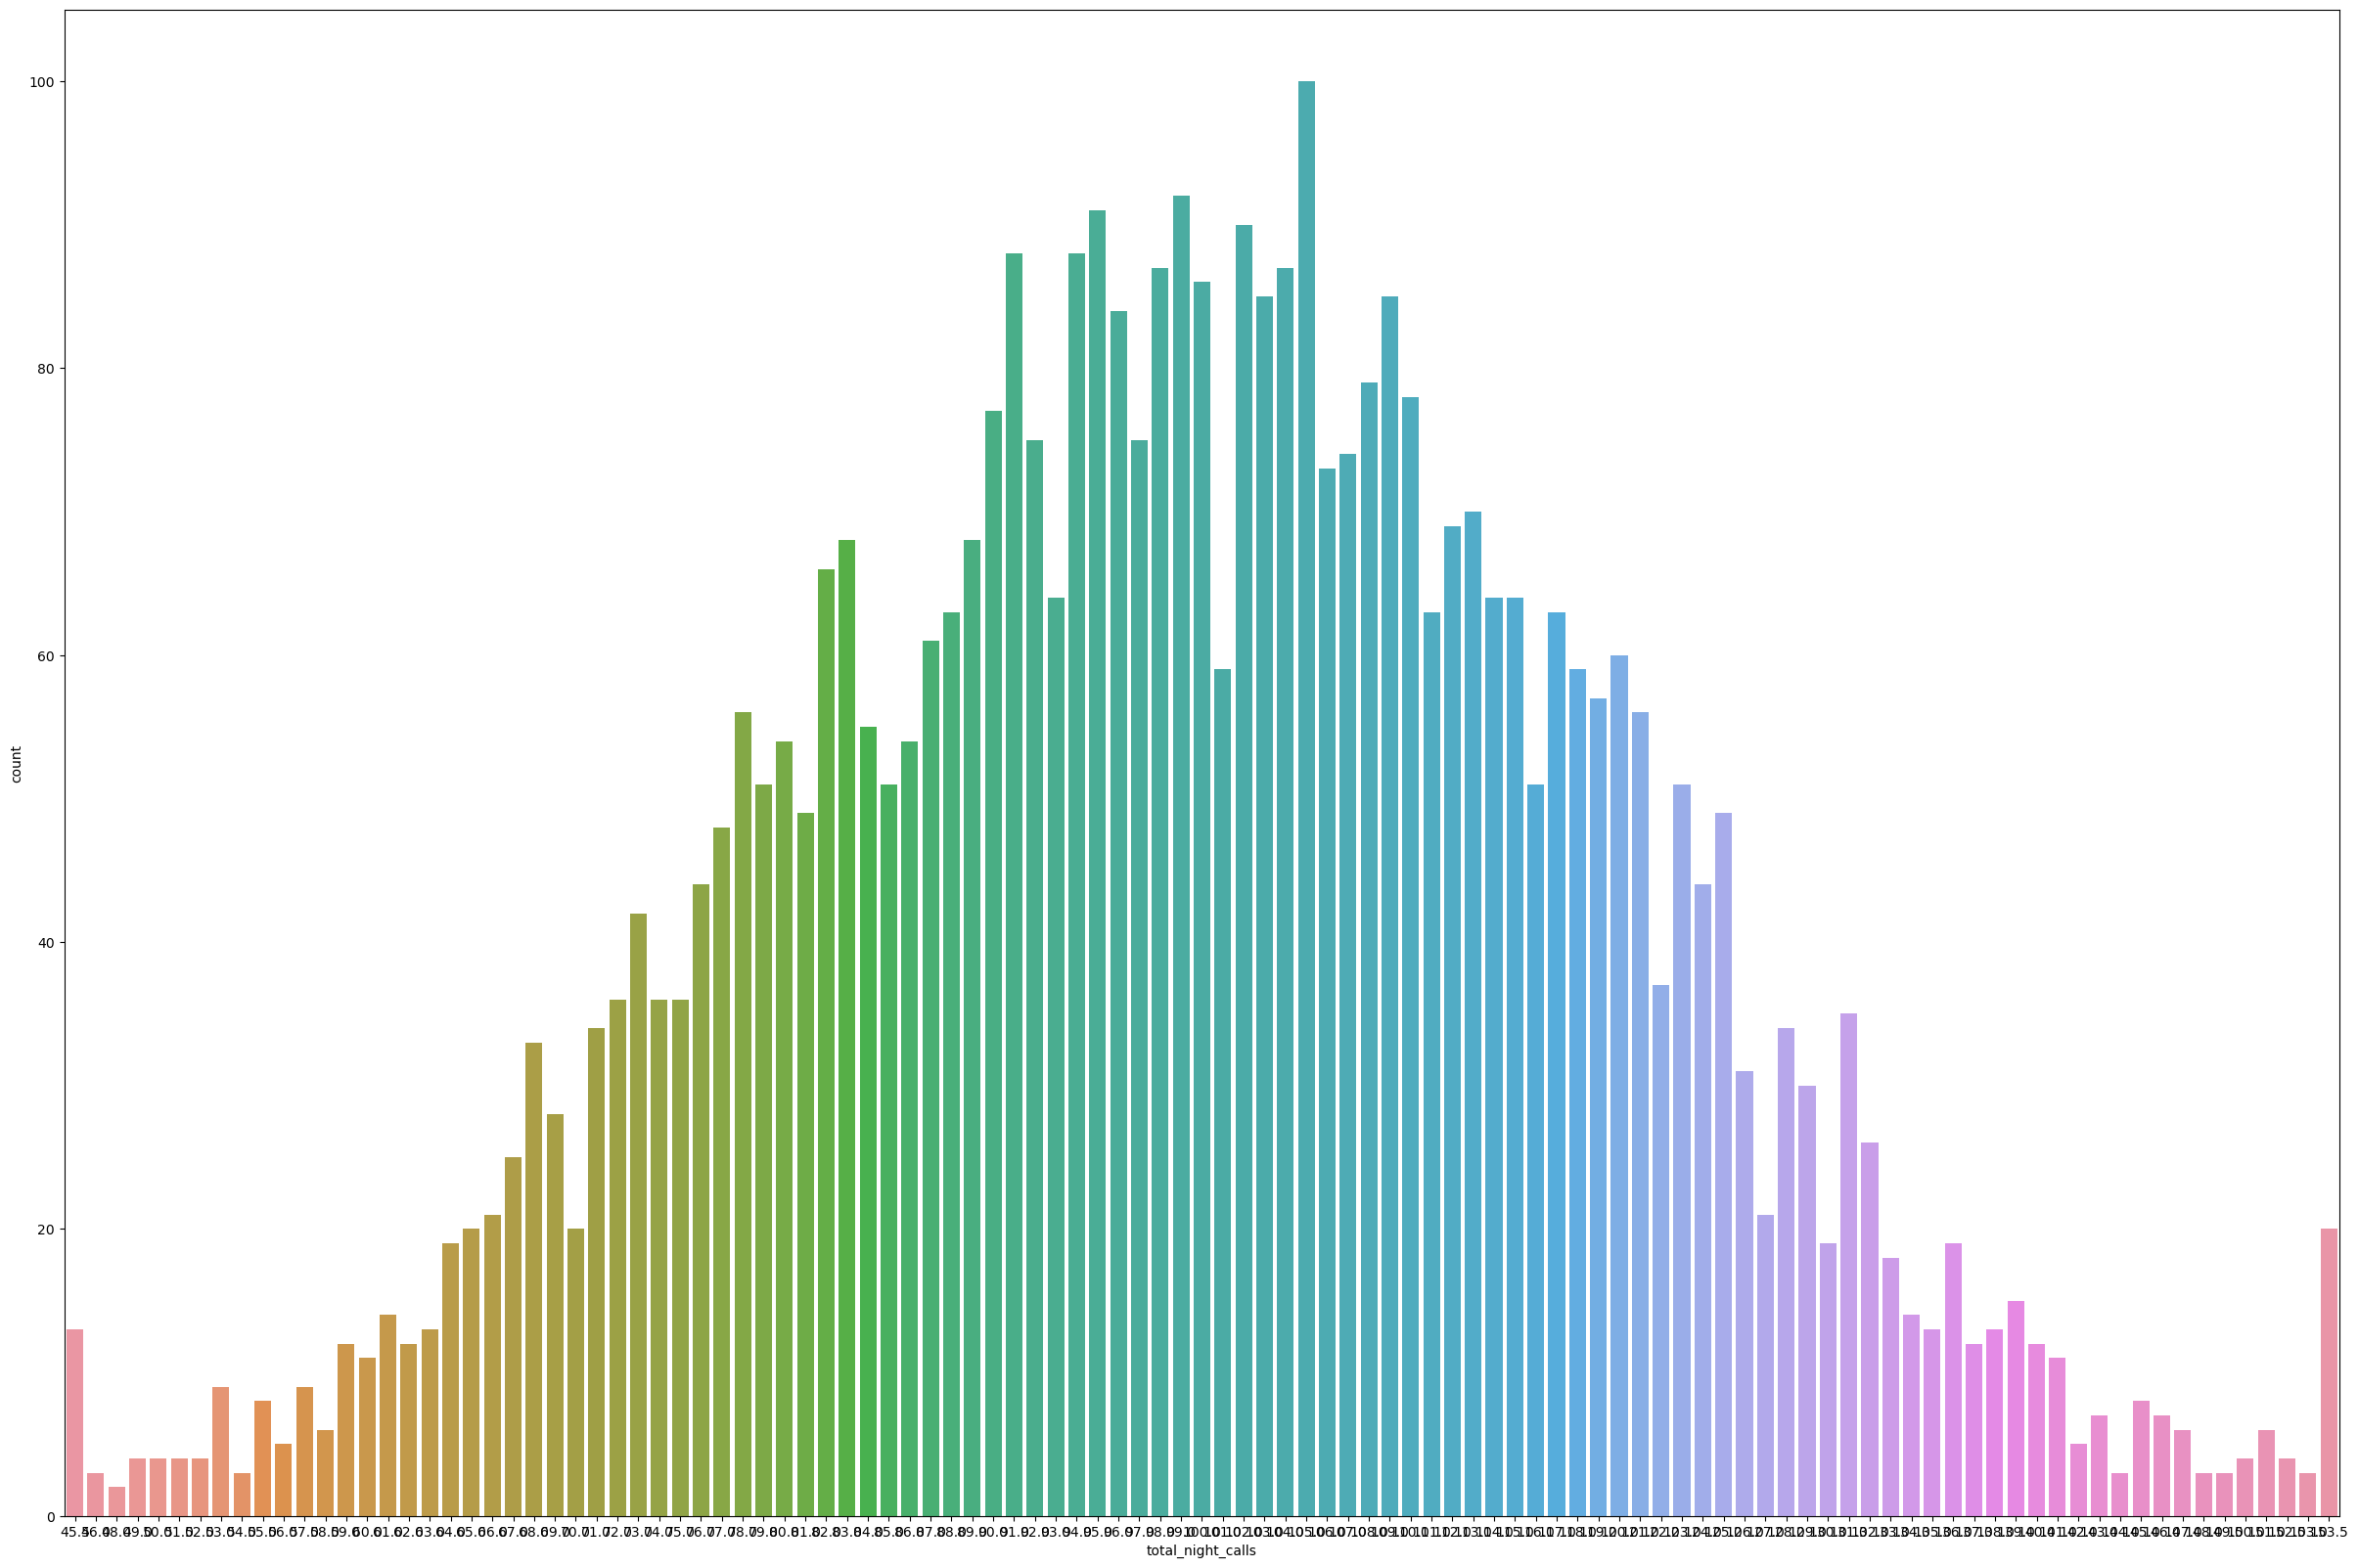


*************************************************************



In [129]:
# Describe the "total_night_calls" column
print("Description of 'total_night_calls' column:")
print(df["total_night_calls"].describe())

print("\n*************************************************************\n")

# Unique values of 'total_night_calls' column
print("Unique values of 'total_night_calls' column:")
print(df["total_night_calls"].unique())

print("\n*************************************************************\n")

# Minimum and maximum values of 'total_night_calls' column
print("Minimum value of 'total_night_calls' column:", df["total_night_calls"].min())
print("Maximum value of 'total_night_calls' column:", df["total_night_calls"].max())

print("\n*************************************************************\n")

# Number of unique values in 'total_night_calls' column
print("Number of unique values in 'total_night_calls' column:", df["total_night_calls"].nunique())

# Plot count of occurrences of "total_night_calls" column
print("\nCount of occurrences of 'total_night_calls' column:")
plt.figure(figsize=(30,20))
sns.countplot(x=df["total_night_calls"])
plt.show()

print("\n*************************************************************\n")



In [130]:
df["total_night_calls"].value_counts()

105.0    100
99.0      92
95.0      91
102.0     90
91.0      88
        ... 
46.0       3
148.0      3
153.0      3
54.0       3
48.0       2
Name: total_night_calls, Length: 109, dtype: int64

In [131]:
# Describe the "total_night_charge" column
print("\nDescription of 'total_night_charge' column:")
print(df["total_night_charge"].describe())

print("\n*************************************************************\n")


print("\n*************************************************************\n")

# Minimum and maximum values of 'total_night_charge' column
print("Minimum value of 'total_night_charge' column:", df["total_night_charge"].min())
print("Maximum value of 'total_night_charge' column:", df["total_night_charge"].max())

print("\n*************************************************************\n")

# Number of unique values in 'total_night_charge' column
print("Number of unique values in 'total_night_charge' column:", df["total_night_charge"].nunique())




Description of 'total_night_charge' column:
count    4250.000000
mean        9.022821
std         2.243829
min         2.966250
25%         7.522500
50%         9.020000
75%        10.560000
max        15.116250
Name: total_night_charge, dtype: float64

*************************************************************


*************************************************************

Minimum value of 'total_night_charge' column: 2.9662499999999996
Maximum value of 'total_night_charge' column: 15.11625

*************************************************************

Number of unique values in 'total_night_charge' column: 959



Distribution of 'total_night_charge' column:


C:\Users\dvlha\AppData\Local\Temp\ipykernel_21748\341864816.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["total_night_charge"])


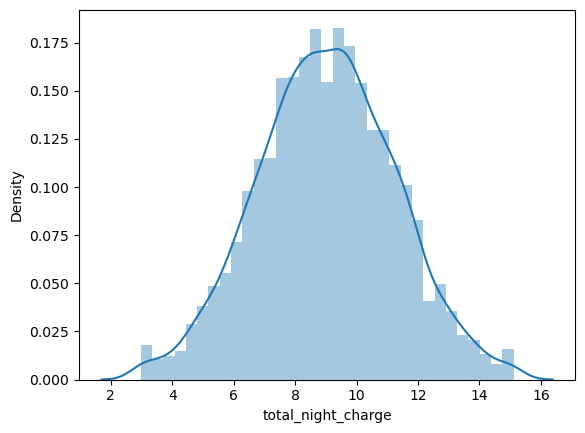


*************************************************************

Skewness of 'total_night_charge' column: -0.004616069846518297


In [132]:
# Plot distribution of "total_night_charge" column
print("\nDistribution of 'total_night_charge' column:")
sns.distplot(df["total_night_charge"])
plt.show()

print("\n*************************************************************\n")

# Skewness of "total_night_charge" column
print("Skewness of 'total_night_charge' column:", df["total_night_charge"].skew())



In [133]:
# Describe the "total_intl_minutes" column
print("\nDescription of 'total_intl_minutes' column:")
print(df["total_intl_minutes"].describe())

print("\n*************************************************************\n")

# Unique values of 'total_intl_minutes' column
print("Unique values of 'total_intl_minutes' column:")
print(df["total_intl_minutes"].unique())

print("\n*************************************************************\n")

# Minimum and maximum values of 'total_intl_minutes' column
print("Minimum value of 'total_intl_minutes' column:", df["total_intl_minutes"].min())
print("Maximum value of 'total_intl_minutes' column:", df["total_intl_minutes"].max())

print("\n*************************************************************\n")

# Number of unique values in 'total_intl_minutes' column
print("Number of unique values in 'total_intl_minutes' column:", df["total_intl_minutes"].nunique())




Description of 'total_intl_minutes' column:
count    4250.000000
mean       10.271812
std         2.677155
min         3.250000
25%         8.500000
50%        10.300000
75%        12.000000
max        17.250000
Name: total_intl_minutes, dtype: float64

*************************************************************

Unique values of 'total_intl_minutes' column:
[13.7  12.2   6.6  10.1   7.5   7.1   8.7  11.2  12.7   9.1  12.3   5.4
 13.8  10.   13.   10.6   5.7   9.5   7.7  10.3  14.7   6.3  11.1  11.8
  8.3  14.5  10.5   9.4  14.6   9.2   3.5   8.5  13.2   7.4  11.    7.8
  6.8  11.4   9.3  10.2   8.    5.8  12.   11.6  12.6   8.2   6.2  12.1
  7.3   6.1  11.7  15.    9.8   8.6  10.9  13.9   8.9   7.9   5.3   4.4
 12.5  11.3   9.    9.6  13.3  17.25 14.2  13.1   7.2   6.4  12.4  14.1
  6.9  11.5  15.8  12.8  16.2   3.25 11.9   9.9   8.4  10.8   8.8  13.4
  9.7  10.7   4.7  13.5  12.9  14.4  10.4   6.7  15.4   6.5  15.6   5.9
  7.6   7.   14.   14.8   3.7   4.8   5.   16.   15.3  14.3 


Distribution of 'total_intl_minutes' column:


C:\Users\dvlha\AppData\Local\Temp\ipykernel_21748\1535575811.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["total_intl_minutes"])


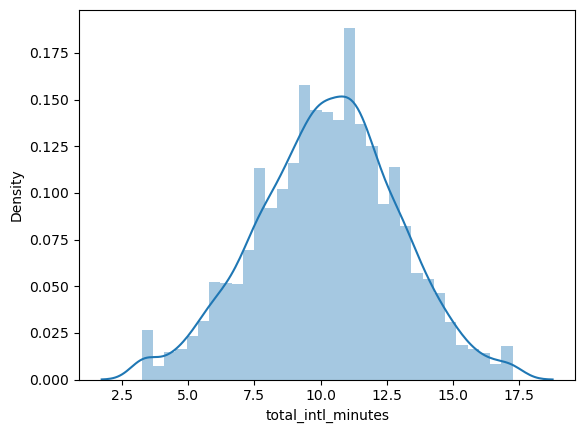


*************************************************************

Skewness of 'total_intl_minutes' column: -0.09412814993937102


In [134]:
# Plot distribution of "total_intl_minutes" column
print("\nDistribution of 'total_intl_minutes' column:")
sns.distplot(df["total_intl_minutes"])
plt.show()

print("\n*************************************************************\n")

# Skewness of "total_intl_minutes" column
print("Skewness of 'total_intl_minutes' column:", df["total_intl_minutes"].skew())



Description of 'total_intl_calls' column:
count    4250.000000
mean        4.370588
std         2.267700
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        10.500000
Name: total_intl_calls, dtype: float64

*************************************************************

Unique values of 'total_intl_calls' column:
[ 3.   5.   7.   6.   4.   2.   9.  10.5  1.   8.  10.   0. ]

*************************************************************

Minimum value of 'total_intl_calls' column: 0.0
Maximum value of 'total_intl_calls' column: 10.5

*************************************************************

Number of unique values in 'total_intl_calls' column: 12

Count of occurrences of 'total_intl_calls' column:


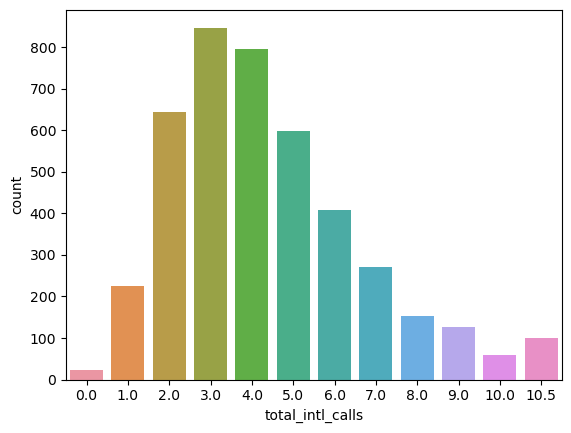


*************************************************************



In [135]:
# Describe the "total_intl_calls" column
print("Description of 'total_intl_calls' column:")
print(df["total_intl_calls"].describe())

print("\n*************************************************************\n")

# Unique values of 'total_intl_calls' column
print("Unique values of 'total_intl_calls' column:")
print(df["total_intl_calls"].unique())

print("\n*************************************************************\n")

# Minimum and maximum values of 'total_intl_calls' column
print("Minimum value of 'total_intl_calls' column:", df["total_intl_calls"].min())
print("Maximum value of 'total_intl_calls' column:", df["total_intl_calls"].max())

print("\n*************************************************************\n")

# Number of unique values in 'total_intl_calls' column
print("Number of unique values in 'total_intl_calls' column:", df["total_intl_calls"].nunique())

# Plot count of occurrences of "total_intl_calls" column
print("\nCount of occurrences of 'total_intl_calls' column:")
sns.countplot(x=df["total_intl_calls"])
plt.show()

print("\n*************************************************************\n")



In [136]:
# Describe the "total_intl_charge" column
print("\nDescription of 'total_intl_charge' column:")
print(df["total_intl_charge"].describe())

print("\n*************************************************************\n")

# Unique values of 'total_intl_charge' column
print("Unique values of 'total_intl_charge' column:")
print(df["total_intl_charge"].unique())

print("\n*************************************************************\n")

# Minimum and maximum values of 'total_intl_charge' column
print("Minimum value of 'total_intl_charge' column:", df["total_intl_charge"].min())
print("Maximum value of 'total_intl_charge' column:", df["total_intl_charge"].max())

print("\n*************************************************************\n")

# Number of unique values in 'total_intl_charge' column
print("Number of unique values in 'total_intl_charge' column:", df["total_intl_charge"].nunique())




Description of 'total_intl_charge' column:
count    4250.000000
mean        2.773972
std         0.722405
min         0.890000
25%         2.300000
50%         2.780000
75%         3.240000
max         4.650000
Name: total_intl_charge, dtype: float64

*************************************************************

Unique values of 'total_intl_charge' column:
[3.7  3.29 1.78 2.73 2.03 1.92 2.35 3.02 3.43 2.46 3.32 1.46 3.73 2.7
 3.51 2.86 1.54 2.57 2.08 2.78 3.97 1.7  3.   3.19 2.24 3.92 2.84 2.54
 3.94 2.48 0.95 2.3  3.56 2.   2.97 2.11 1.84 3.08 2.51 2.75 2.16 1.57
 3.24 3.13 3.4  2.21 1.67 3.27 1.97 1.65 3.16 4.05 2.65 2.32 2.94 3.75
 2.4  2.13 1.43 1.19 3.38 3.05 2.43 2.59 3.59 4.65 3.83 3.54 1.94 1.73
 3.35 3.81 1.86 3.11 4.27 3.46 4.37 0.89 3.21 2.67 2.27 2.92 2.38 3.62
 2.62 2.89 1.27 3.65 3.48 3.89 2.81 1.81 4.16 1.76 4.21 1.59 2.05 1.89
 3.78 4.   1.   1.3  1.35 4.32 4.13 3.86 3.67 4.64 2.19 1.51 0.97 4.46
 1.24 1.38 1.11 1.62 4.19 4.4  4.43 4.51 4.1  4.08 4.29 1.49 4.02 1.08
 


Distribution of 'total_intl_charge' column:


C:\Users\dvlha\AppData\Local\Temp\ipykernel_21748\641496495.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["total_intl_charge"])


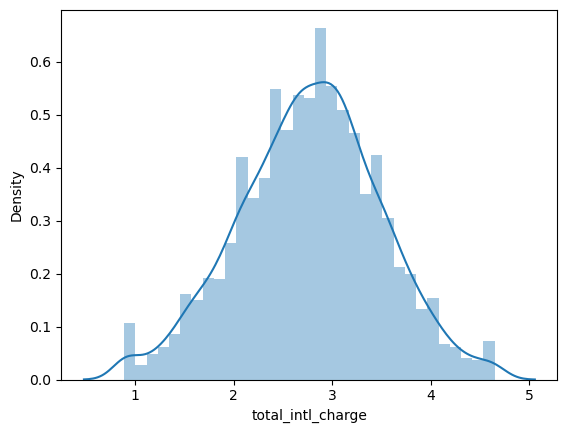


*************************************************************

Skewness of 'total_intl_charge' column: -0.09284993063860378


In [137]:
# Plot distribution of "total_intl_charge" column
print("\nDistribution of 'total_intl_charge' column:")
sns.distplot(df["total_intl_charge"])
plt.show()

print("\n*************************************************************\n")

# Skewness of "total_intl_charge" column
print("Skewness of 'total_intl_charge' column:", df["total_intl_charge"].skew())


Description of 'number_customer_service_calls' column:
count    4250.000000
mean        1.559059
std         1.311434
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: number_customer_service_calls, dtype: float64

*************************************************************

Unique values of 'number_customer_service_calls' column:
[1 0 2 3 4 5 7 9 6 8]

*************************************************************

Minimum value of 'number_customer_service_calls' column: 0
Maximum value of 'number_customer_service_calls' column: 9

*************************************************************

Number of unique values in 'number_customer_service_calls' column: 10

Count of occurrences of 'number_customer_service_calls' column:


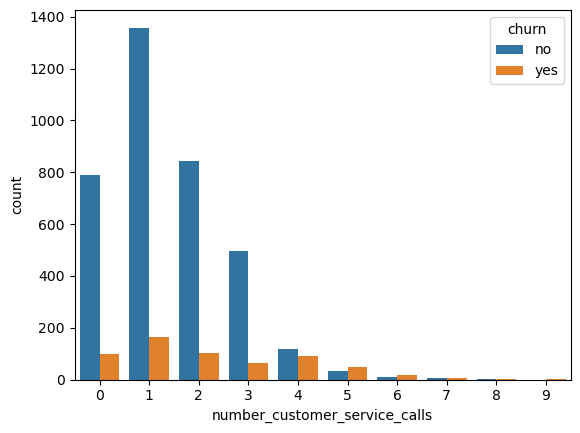


*************************************************************



In [138]:
# Describe the "number_customer_service_calls" column
print("Description of 'number_customer_service_calls' column:")
print(df["number_customer_service_calls"].describe())

print("\n*************************************************************\n")

# Unique values of 'number_customer_service_calls' column
print("Unique values of 'number_customer_service_calls' column:")
print(df["number_customer_service_calls"].unique())

print("\n*************************************************************\n")

# Minimum and maximum values of 'number_customer_service_calls' column
print("Minimum value of 'number_customer_service_calls' column:", df["number_customer_service_calls"].min())
print("Maximum value of 'number_customer_service_calls' column:", df["number_customer_service_calls"].max())

print("\n*************************************************************\n")

# Number of unique values in 'number_customer_service_calls' column
print("Number of unique values in 'number_customer_service_calls' column:", df["number_customer_service_calls"].nunique())

# Plot count of occurrences of "number_customer_service_calls" column
print("\nCount of occurrences of 'number_customer_service_calls' column:")
sns.countplot(x=df["number_customer_service_calls"],hue=df["churn"])
plt.show()

print("\n*************************************************************\n")


In [139]:
df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [140]:
df.head()

state  account_length  area_code international_plan voice_mail_plan  \
0    OH             107      415.0                 no             yes   
1    NJ             137      415.0                 no              no   
2    OH              84      408.0                yes              no   
3    OK              75      415.0                yes              no   
4    MA             121      425.5                 no             yes   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     26              161.6              123   
1                      0              243.4              114   
2                      0              299.4               71   
3                      0              166.7              113   
4                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47             195.50            103.0            16.620   
1             41.38             121.20            110.0            10.300   
2             50.90              64.15             88.0             5.455   
3             28.34             148.30            122.0            12.610   
4             37.09             335.55            108.0            28.515   

   total_night_minutes  total_night_calls  total_night_charge  \
0                254.4              103.0               11.45   
1                162.6              104.0                7.32   
2                196.9               89.0                8.86   
3                186.9              121.0                8.41   
4                212.6              118.0                9.57   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                13.7               3.0               3.70   
1                12.2               5.0               3.29   
2                 6.6               7.0               1.78   
3                10.1               3.0               2.73   
4                 7.5               7.0               2.03   

   number_customer_service_calls churn  
0                              1    no  
1                              0    no  
2                              2    no  
3                              3    no  
4                              3    no

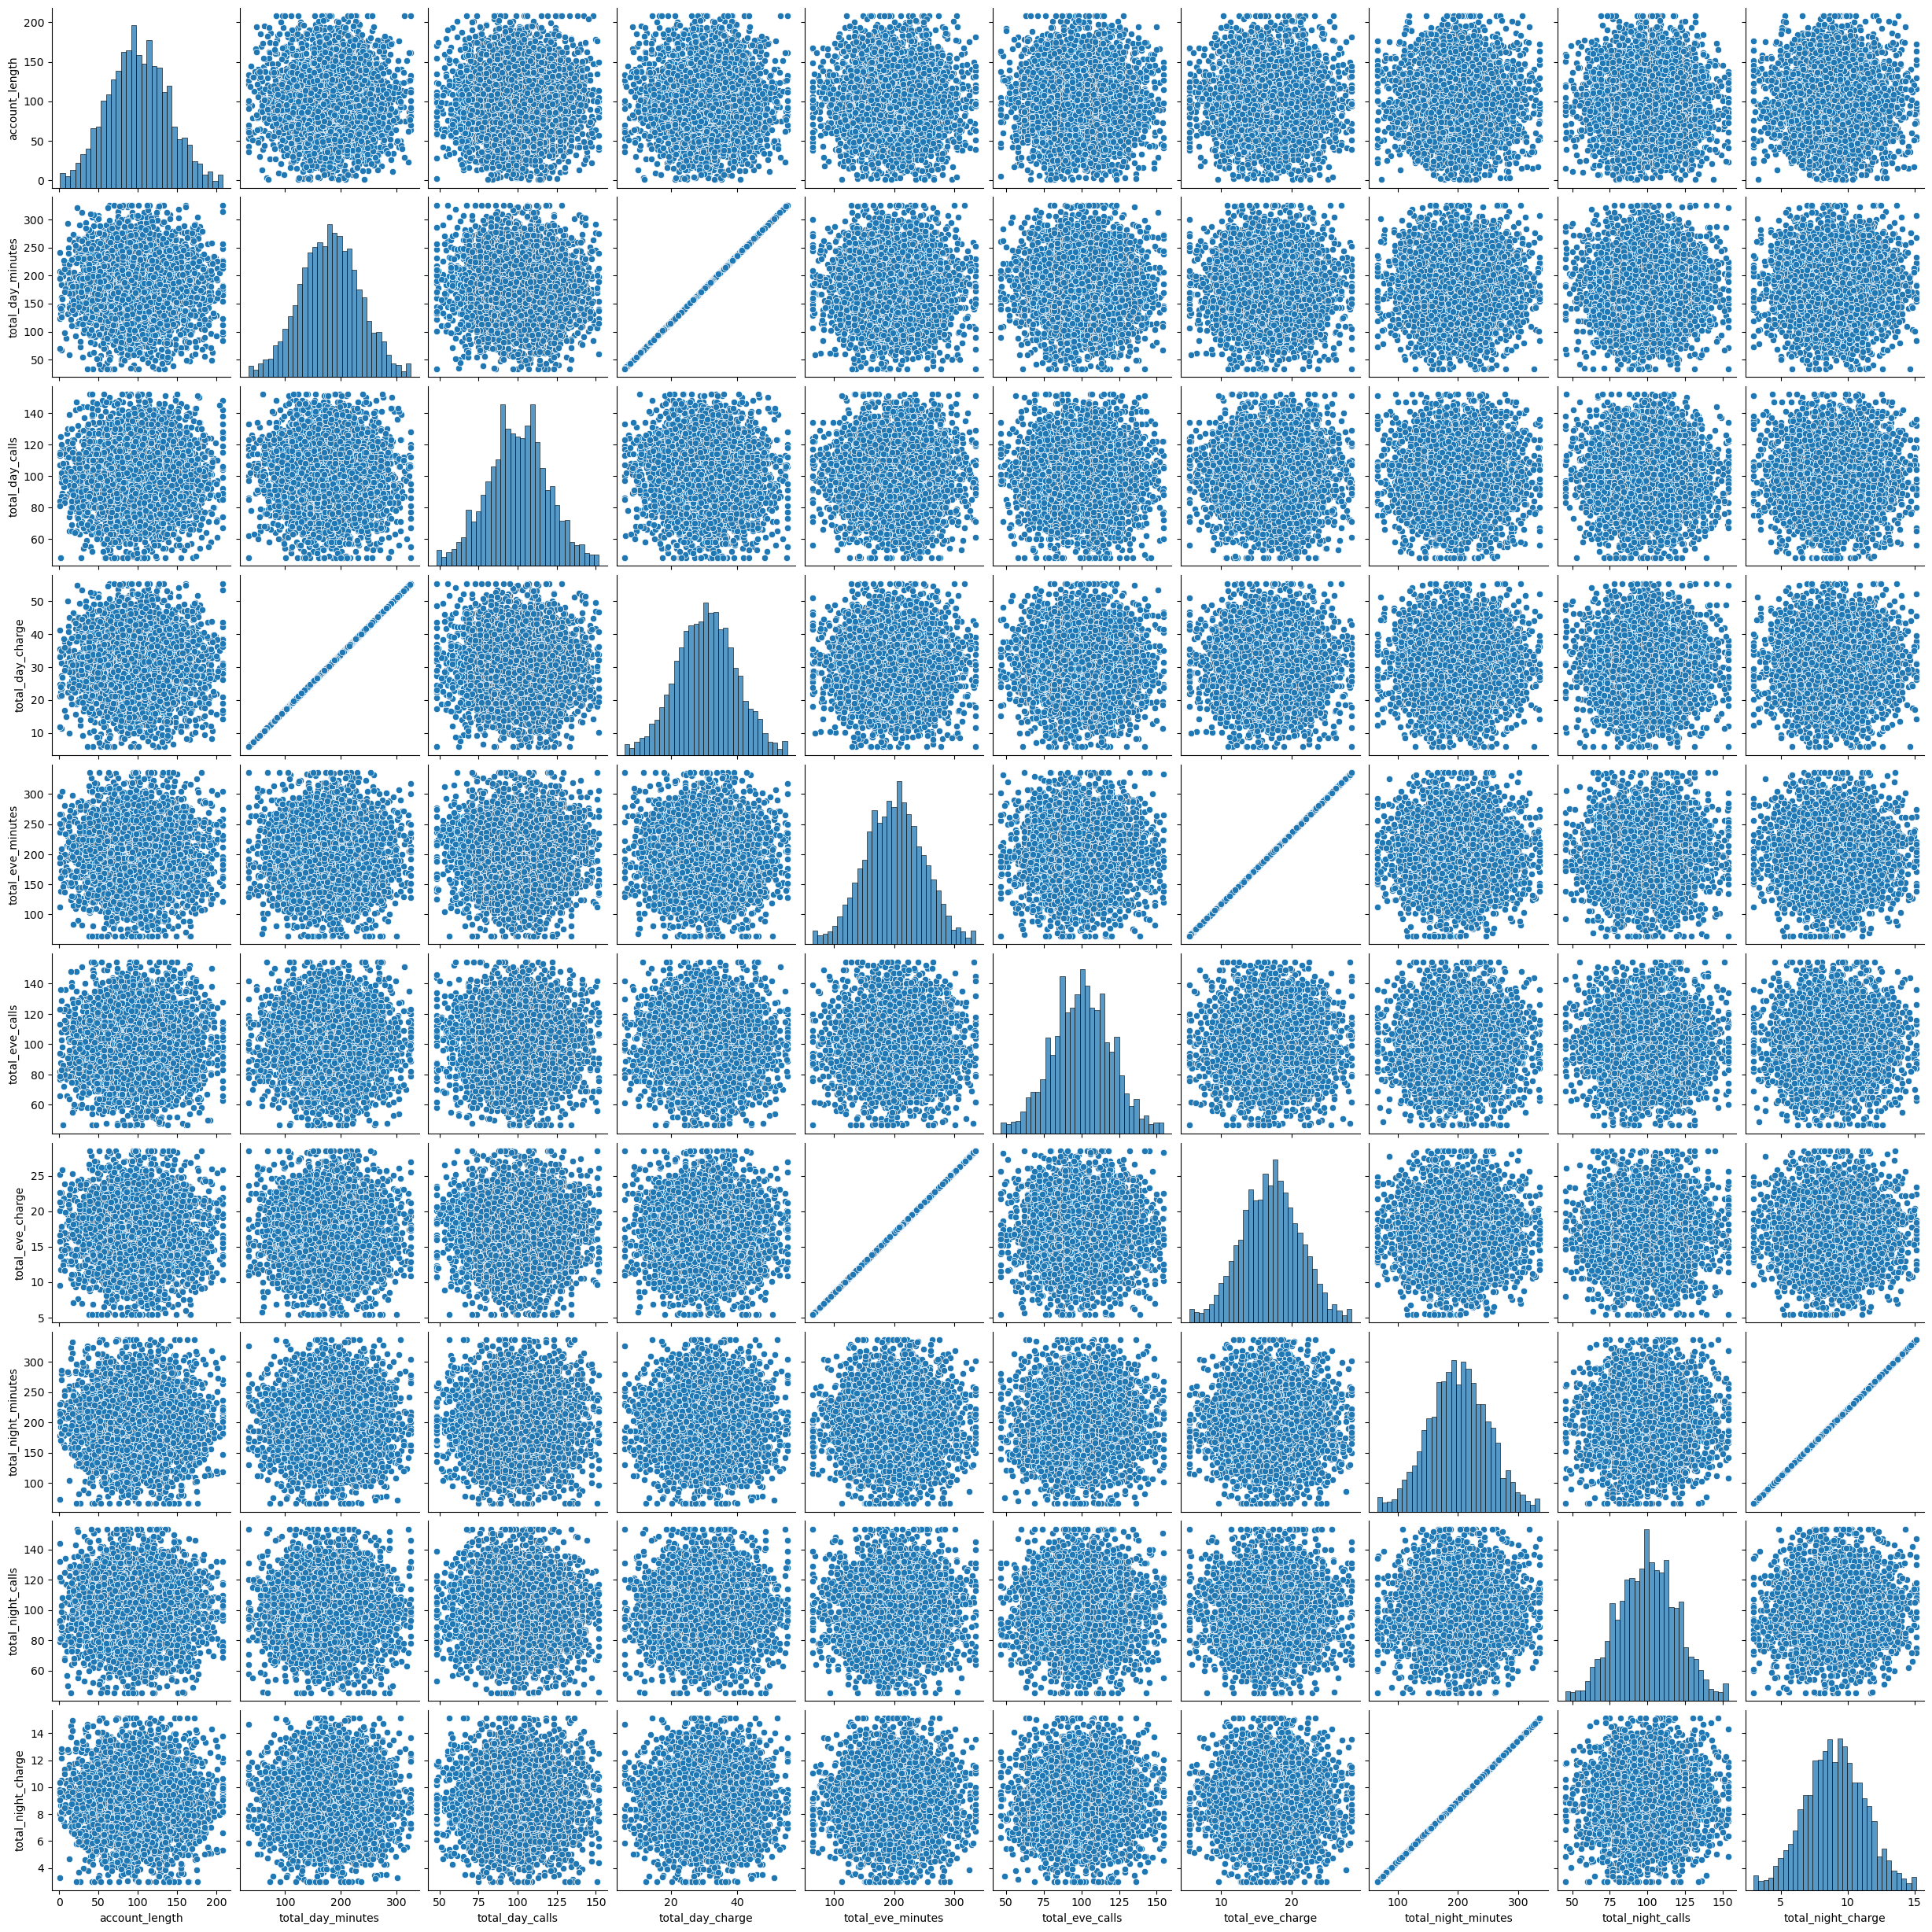

In [141]:

columns_for_pairplot = ['account_length', 'total_day_minutes', 'total_day_calls', 'total_day_charge','total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge']


sns.pairplot(df[columns_for_pairplot])
plt.show()


In [142]:
df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

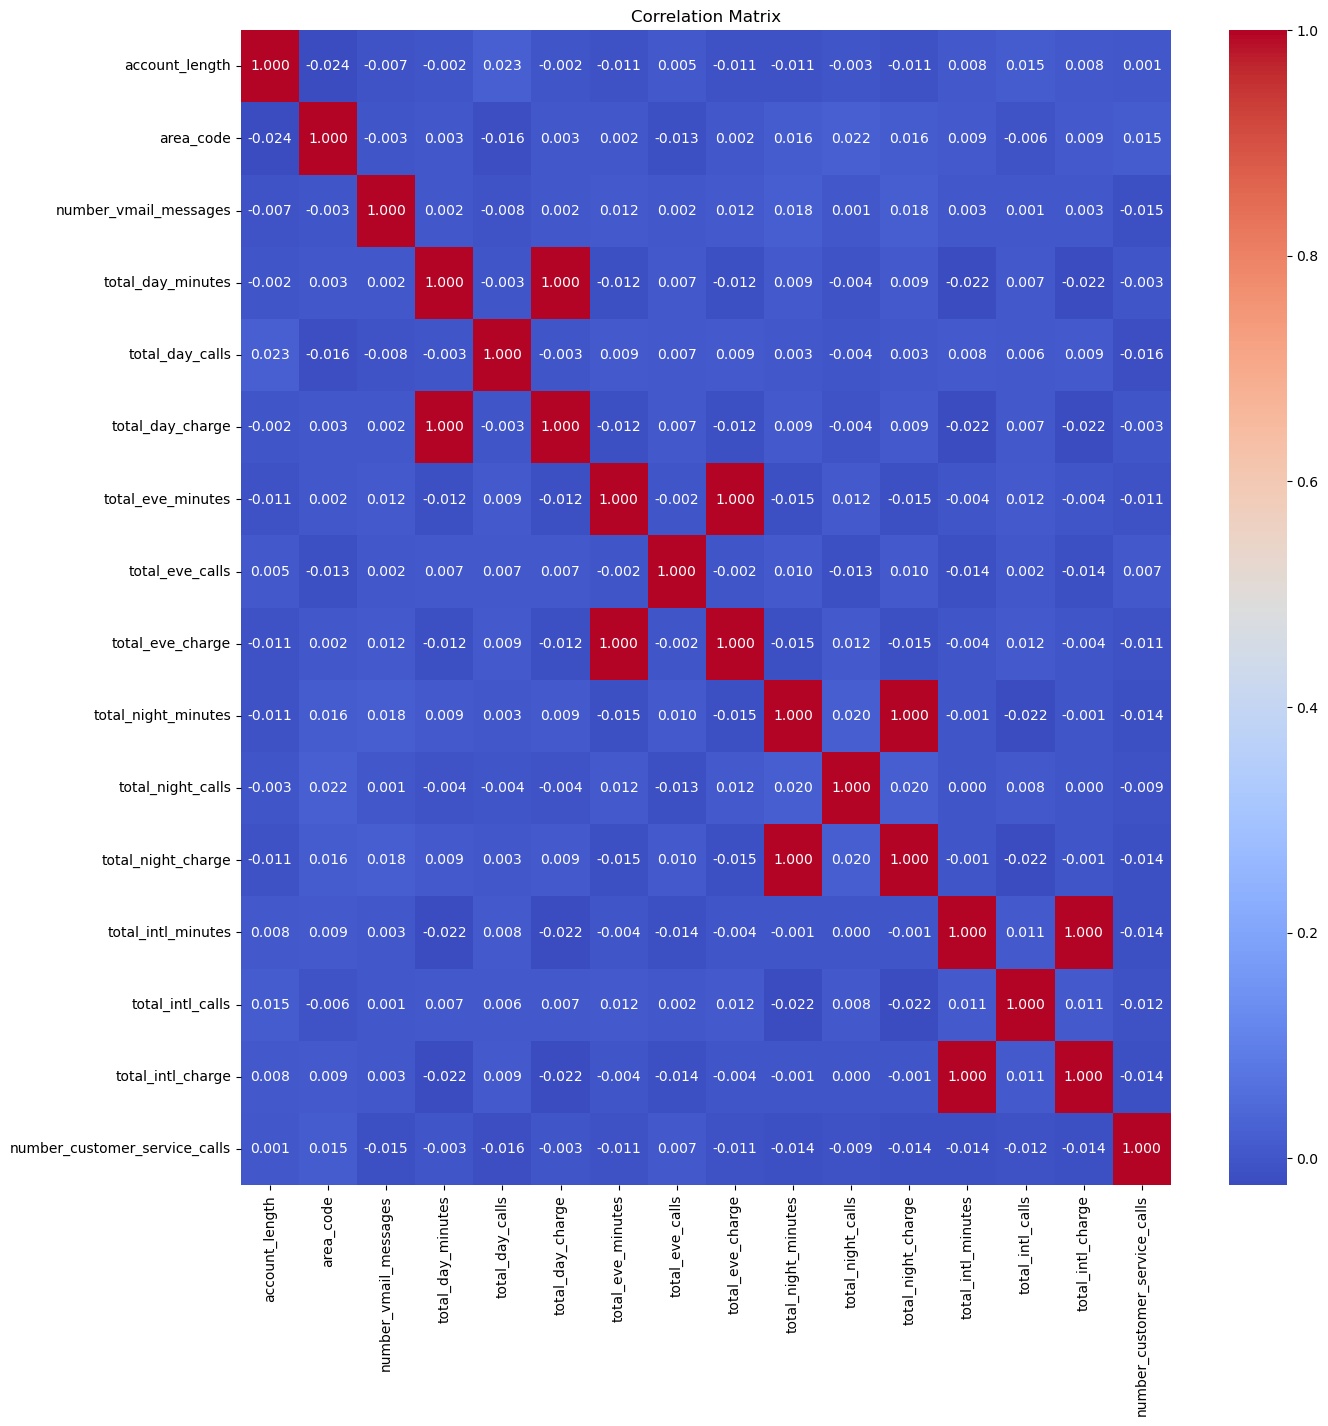

In [143]:

df2 = df.drop(['state', 'churn', 'international_plan', 'voice_mail_plan'], axis=1)

correlation_matrix = df2.corr()

# Plot heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Correlation Matrix')
plt.show()


# churn vs state

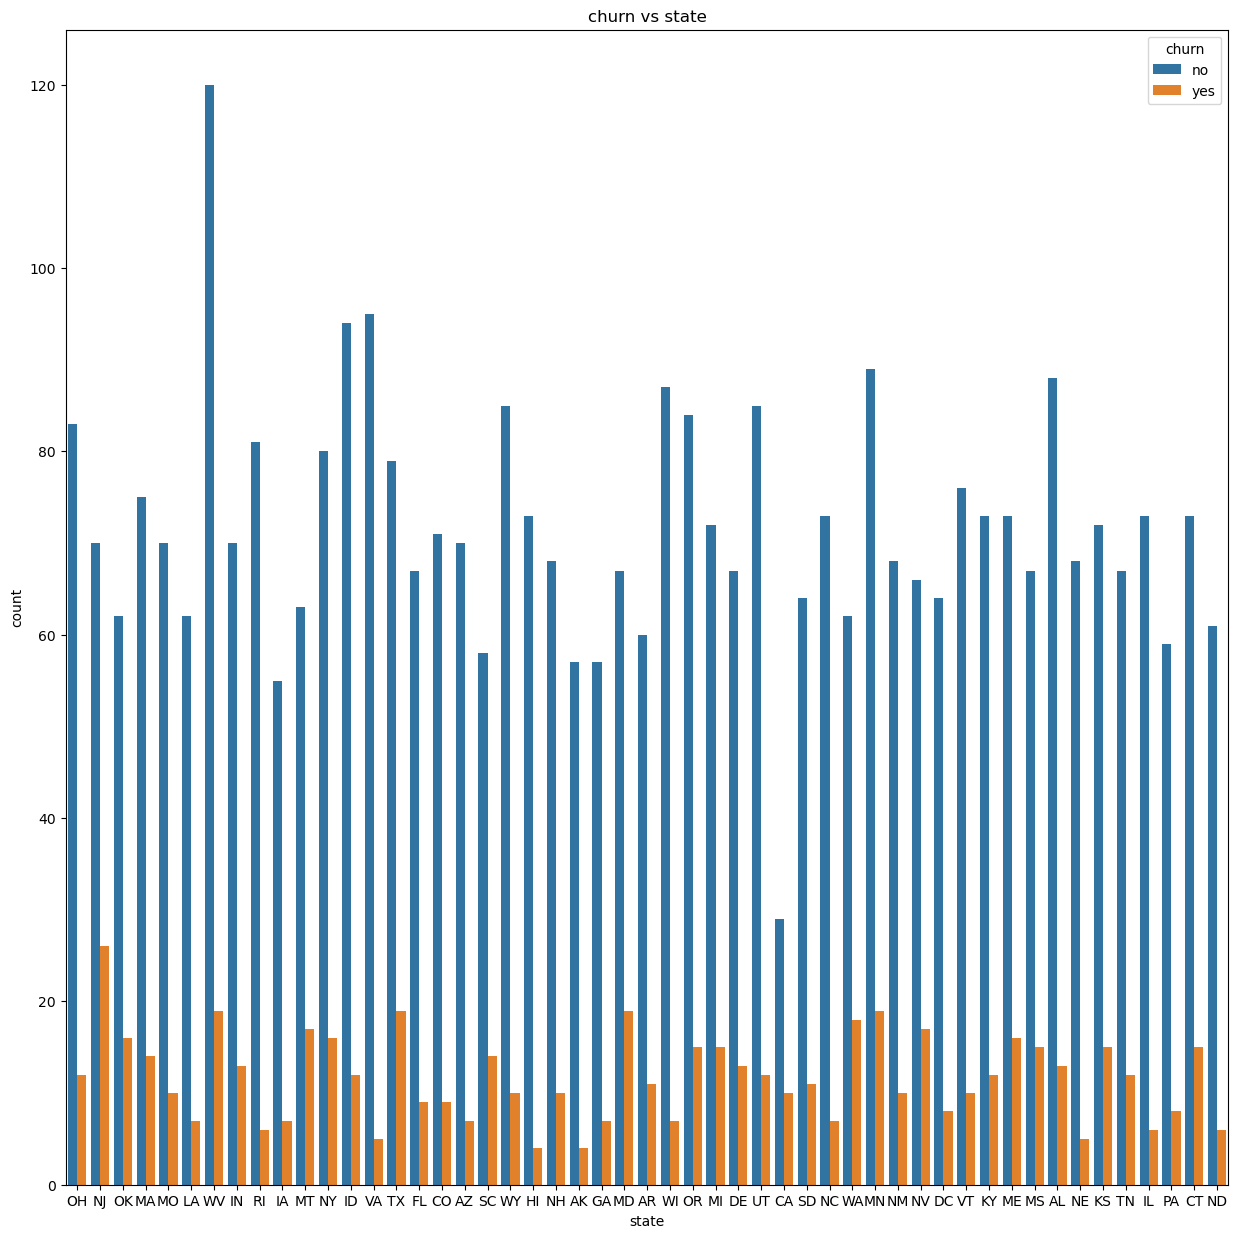

In [144]:
plt.figure(figsize=(15, 15))
sns.countplot(x="state", hue="churn", data=df)
plt.title("churn vs state")
plt.show()

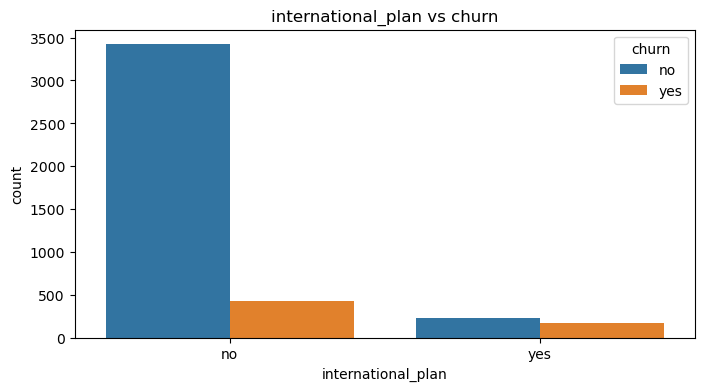

In [145]:
plt.figure(figsize=(8,4))
sns.countplot(x="international_plan", hue="churn", data=df)
plt.title("international_plan vs churn")
plt.show()

In [146]:
a=(len(df[(df["international_plan"]=="yes") & (df["churn"]=="yes")])/len(df[(df["international_plan"]=="yes")]))*100
b=(len(df[(df["international_plan"]=="no") & (df["churn"]=="yes")])/len(df[(df["international_plan"]=="no")]))*100



print(a, "are churn out of all international planed counstomers")
print(b, "are churn out of all non international planed counstomers")

42.17171717171717 are churn out of all international planed counstomers
11.183186299948106 are churn out of all non international planed counstomers


# area code vs state

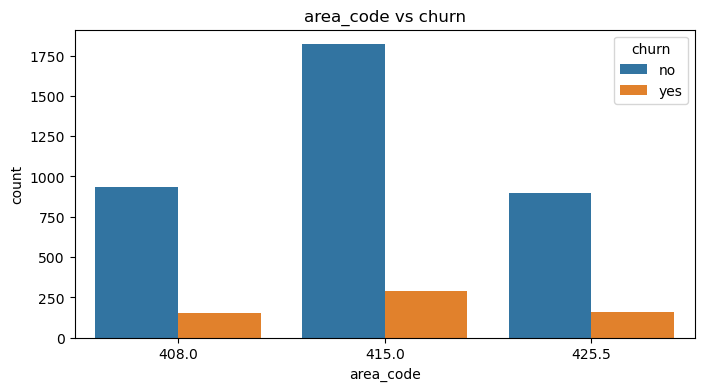

In [147]:
plt.figure(figsize=(8,4))
sns.countplot(x="area_code", hue="churn", data=df)
plt.title("area_code vs churn")
plt.show()

# voice_mail_plan vs churn

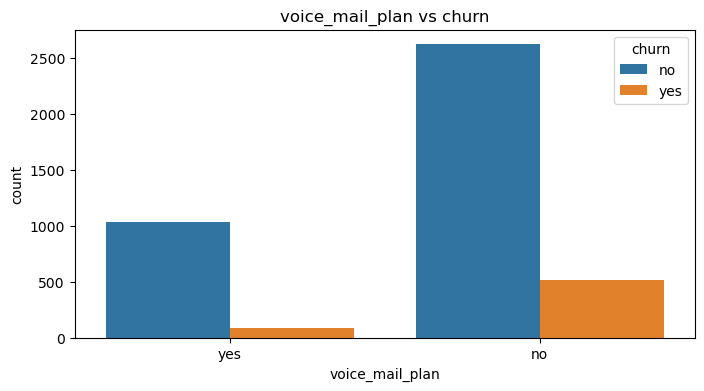

In [148]:
plt.figure(figsize=(8,4))
sns.countplot(x="voice_mail_plan", hue="churn", data=df)
plt.title("voice_mail_plan vs churn")
plt.show()

In [149]:
df

state  account_length  area_code international_plan voice_mail_plan  \
0       OH             107      415.0                 no             yes   
1       NJ             137      415.0                 no              no   
2       OH              84      408.0                yes              no   
3       OK              75      415.0                yes              no   
4       MA             121      425.5                 no             yes   
...    ...             ...        ...                ...             ...   
4245    MT              83      415.0                 no              no   
4246    WV              73      408.0                 no              no   
4247    NC              75      408.0                 no              no   
4248    HI              50      408.0                 no             yes   
4249    VT              86      415.0                 no             yes   

      number_vmail_messages  total_day_minutes  total_day_calls  \
0                        26              161.6              123   
1                         0              243.4              114   
2                         0              299.4               71   
3                         0              166.7              113   
4                        24              218.2               88   
...                     ...                ...              ...   
4245                      0              188.3               70   
4246                      0              177.9               89   
4247                      0              170.7              101   
4248                     40              235.7              127   
4249                     34              129.4              102   

      total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0                27.47             195.50            103.0            16.620   
1                41.38             121.20            110.0            10.300   
2                50.90              64.15             88.0             5.455   
3                28.34             148.30            122.0            12.610   
4                37.09             335.55            108.0            28.515   
...                ...                ...              ...               ...   
4245             32.01             243.80             88.0            20.720   
4246             30.24             131.20             82.0            11.150   
4247             29.02             193.10            126.0            16.410   
4248             40.07             223.00            126.0            18.960   
4249             22.00             267.10            104.0            22.700   

      total_night_minutes  total_night_calls  total_night_charge  \
0                   254.4              103.0               11.45   
1                   162.6              104.0                7.32   
2                   196.9               89.0                8.86   
3                   186.9              121.0                8.41   
4                   212.6              118.0                9.57   
...                   ...                ...                 ...   
4245                213.7               79.0                9.62   
4246                186.2               89.0                8.38   
4247                129.1              104.0                5.81   
4248                297.5              116.0               13.39   
4249                154.8              100.0                6.97   

      total_intl_minutes  total_intl_calls  total_intl_charge  \
0                   13.7               3.0               3.70   
1                   12.2               5.0               3.29   
2                    6.6               7.0               1.78   
3                   10.1               3.0               2.73   
4                    7.5               7.0               2.03   
...                  ...               ...                ...   
4245                10.3               6.0            

# number_customer_service_calls	 vs churn

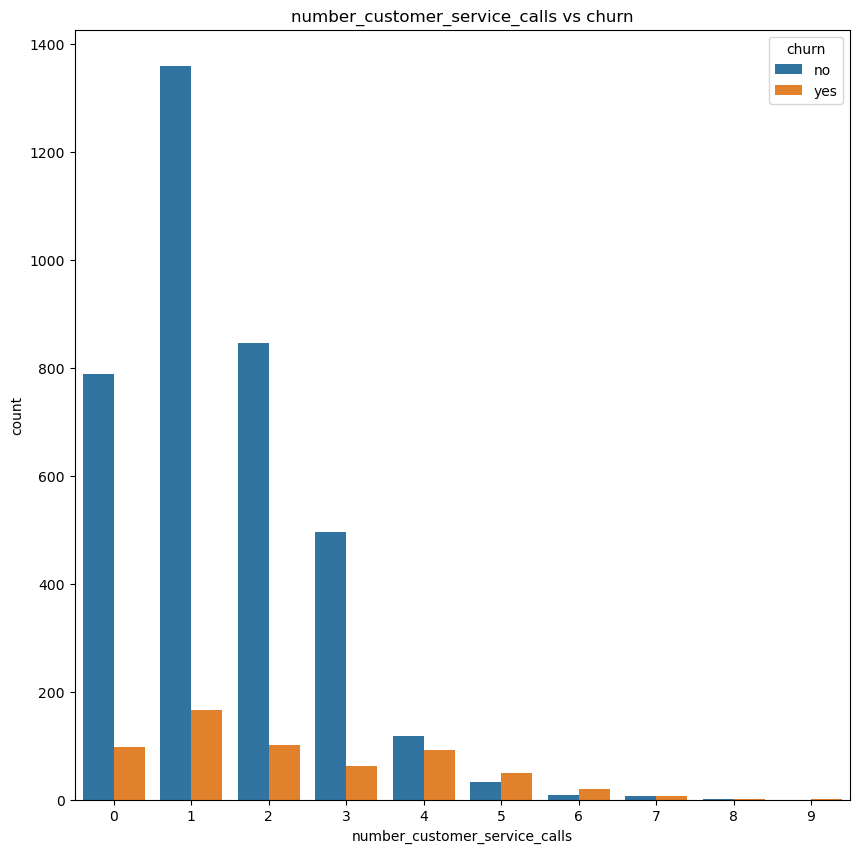

In [150]:
plt.figure(figsize=(10,10))
sns.countplot(x="number_customer_service_calls", hue="churn", data=df)
plt.title("number_customer_service_calls vs churn")
plt.show()

# feature creation

In [151]:
df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [152]:
len(df)

4250

In [153]:
l_total_min=[df["total_day_minutes"][i]+df['total_eve_minutes'][i]+df['total_night_minutes'][i] for i in range(len(df))]

In [154]:
l_total_call=[df["total_day_calls"][i]+df['total_eve_calls'][i]+df['total_night_calls'][i] for i in range(len(df))]

In [155]:
l_total_charge=[df["total_day_charge"][i]+df['total_eve_charge'][i]+df['total_night_charge'][i] for i in range(len(df))]

In [156]:
df["total_min"]=l_total_min
df["total_call"]=l_total_call
df["total_charge"]=l_total_charge

In [157]:
l_days=[i*30 for i in df["account_length"]]

In [158]:
l_weeks=[i/4 for i in df["account_length"]]

In [159]:
l_year=[i/12 for i in df["account_length"]]

In [160]:
df["plan_day"]=l_days

In [161]:
df["plan_weeks"]=l_weeks

In [162]:
df["plan_years"]=l_year

In [163]:
l_charge_day=df["total_charge"]/df["plan_day"]

In [164]:
df["charge_day"]=l_charge_day

In [165]:
df

state  account_length  area_code international_plan voice_mail_plan  \
0       OH             107      415.0                 no             yes   
1       NJ             137      415.0                 no              no   
2       OH              84      408.0                yes              no   
3       OK              75      415.0                yes              no   
4       MA             121      425.5                 no             yes   
...    ...             ...        ...                ...             ...   
4245    MT              83      415.0                 no              no   
4246    WV              73      408.0                 no              no   
4247    NC              75      408.0                 no              no   
4248    HI              50      408.0                 no             yes   
4249    VT              86      415.0                 no             yes   

      number_vmail_messages  total_day_minutes  total_day_calls  \
0                        26              161.6              123   
1                         0              243.4              114   
2                         0              299.4               71   
3                         0              166.7              113   
4                        24              218.2               88   
...                     ...                ...              ...   
4245                      0              188.3               70   
4246                      0              177.9               89   
4247                      0              170.7              101   
4248                     40              235.7              127   
4249                     34              129.4              102   

      total_day_charge  total_eve_minutes  ...  total_intl_charge  \
0                27.47             195.50  ...               3.70   
1                41.38             121.20  ...               3.29   
2                50.90              64.15  ...               1.78   
3                28.34             148.30  ...               2.73   
4                37.09             335.55  ...               2.03   
...                ...                ...  ...                ...   
4245             32.01             243.80  ...               2.78   
4246             30.24             131.20  ...               3.11   
4247             29.02             193.10  ...               1.86   
4248             40.07             223.00  ...               2.67   
4249             22.00             267.10  ...               2.51   

      number_customer_service_calls  churn  total_min  total_call  \
0                                 1     no     611.50       329.0   
1                                 0     no     527.20       328.0   
2                                 2     no     560.45       248.0   
3                                 3     no     501.90       356.0   
4                                 3     no     766.35       314.0   
...                             ...    ...        ...         ...   
4245                              0     no     645.80       237.0   
4246                              3     no     495.30       260.0   
4247                              1     no     492.90       331.0   
4248                              2     no     756.20       369.0   
4249                              0     no     551.30       306.0   

      total_charge  plan_day  plan_weeks  plan_years charge_day  
0           55.540      3210       26.75    8.916667   0.017302  
1           59.000      4110       34.25   11.416667   0.014355  
2           65.215      2520       21.00    7.000000   0.025879  
3           49.360      2250       18.75    6.250000   0.021938  
4           75.175      3630       30.25   10.083333   0.020709  
...            ...       ...         ...         ...        ...  
4245        62.350      2490       20.75    6.916667   0.025040  
4246        49.770      2190       18.25    6.083333   0.022726  
4247        51.240      2250       

In [166]:
df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn', 'total_min', 'total_call',
       'total_charge', 'plan_day', 'plan_weeks', 'plan_years', 'charge_day'],
      dtype='object')

# model building
# Split data into training and testing sets

In [167]:
x = df.drop('churn', axis=1)
y = df['churn']

In [168]:
x.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'total_min', 'total_call',
       'total_charge', 'plan_day', 'plan_weeks', 'plan_years', 'charge_day'],
      dtype='object')

In [169]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


In [170]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=2)

In [171]:
 #pipeline of decision tree

In [172]:
import pickle
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [173]:
ohe_cols = ['state', 'international_plan', 'voice_mail_plan']

scale_cols = ['account_length', 'area_code', 'number_vmail_messages', 'total_day_minutes', 
              'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 
              'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 
              'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 
              'number_customer_service_calls', 'total_min', 'total_call', 'total_charge', 
              'plan_day', 'plan_weeks', 'plan_years', 'charge_day']


In [174]:


pipeline_dec = Pipeline([
    ('data_preparation', ColumnTransformer([('onehot', OneHotEncoder(), ohe_cols),('scaling', MinMaxScaler(), scale_cols)])),
    ('classifier', DecisionTreeClassifier(splitter="best", criterion="gini", max_depth=5, min_samples_split=2, min_samples_leaf=5))
])



In [175]:
pipeline_dec.fit(x_train,y_train)

Pipeline(steps=[('data_preparation',
                 ColumnTransformer(transformers=[('onehot', OneHotEncoder(),
                                                  ['state',
                                                   'international_plan',
                                                   'voice_mail_plan']),
                                                 ('scaling', MinMaxScaler(),
                                                  ['account_length',
                                                   'area_code',
                                                   'number_vmail_messages',
                                                   'total_day_minutes',
                                                   'total_day_calls',
                                                   'total_day_charge',
                                                   'total_eve_minutes',
                                                   'total_eve_calls',
                                                   'total_eve_charge',
                                                   'total_night_minutes',
                                                   'total_night_calls',
                                                   'total_night_charge',
                                                   'total_intl_minutes',
                                                   'total_intl_calls',
                                                   'total_intl_charge',
                                                   'number_customer_service_calls',
                                                   'total_min', 'total_call',
                                                   'total_charge', 'plan_day',
                                                   'plan_weeks', 'plan_years',
                                                   'charge_day'])])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=5))])

# evalution metrix

In [176]:
y_test_pred=pipeline_dec.predict(x_test)
y_train_pred=pipeline_dec.predict(x_train)

In [177]:
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

In [178]:
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred)

In [179]:
print("Training Evaluation Metrics:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1 Score:", train_f1)
print("ROC AUC Score:", train_roc_auc)





Training Evaluation Metrics:
Accuracy: 0.972156862745098
Precision: 0.975
Recall: 0.832
F1 Score: 0.897841726618705
ROC AUC Score: 0.9141609195402298


In [180]:
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1)
print("Test ROC AUC Score:", test_roc_auc)

Test Accuracy: 0.9747058823529412
Test Precision: 0.96875
Test Recall: 0.8340807174887892
Test F1 Score: 0.8963855421686747
Test ROC AUC Score: 0.9150092145331555


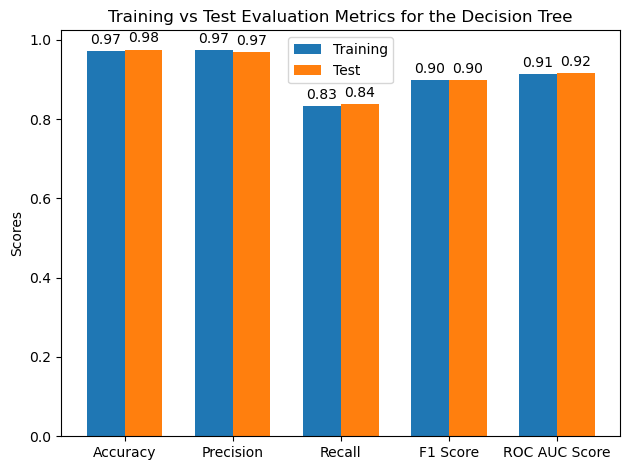

In [181]:
import matplotlib.pyplot as plt
import numpy as np

# Data for training and test evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score']
training_metrics = [0.972156862745098, 0.975, 0.832, 0.897841726618705, 0.9141609195402298]
test_metrics = [0.9752941176470589, 0.9689119170984456, 0.8385650224215246, 0.8990384615384616, 0.9172513669995234]

x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, training_metrics, width, label='Training')
rects2 = ax.bar(x + width/2, test_metrics, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Training vs Test Evaluation Metrics for the Decision Tree')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Attach a text label above each bar in rects, displaying its height.
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


# cross val score

In [182]:
from sklearn.model_selection import cross_validate


cv_results = cross_validate(pipeline_dec, x_train, y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])




In [183]:
print("\nTesting Scores:")
print("Accuracy:", cv_results['test_accuracy'].mean())
print("Precision:", cv_results['test_precision'].mean())
print("Recall:", cv_results['test_recall'].mean())
print("F1 Score:", cv_results['test_f1'].mean())
print("ROC AUC Score:", cv_results['test_roc_auc'].mean())



Testing Scores:
Accuracy: 0.9678431372549021
Precision: 0.9580279955595643
Recall: 0.8186666666666668
F1 Score: 0.8812063067003717
ROC AUC Score: 0.9150590038314176


# random forest pipeline

In [184]:


pipeline_random_forest = Pipeline([
    ('data_preparation', ColumnTransformer([('onehot', OneHotEncoder(), ohe_cols),('scaling', MinMaxScaler(), scale_cols)])),
    ('classifier', RandomForestClassifier(
        n_estimators=70, 
        criterion="gini",
        max_depth=13,
        min_samples_split=4,
        min_samples_leaf=2,
        random_state=42 
    ))
])



In [185]:
pipeline_random_forest.fit(x_train,y_train)

Pipeline(steps=[('data_preparation',
                 ColumnTransformer(transformers=[('onehot', OneHotEncoder(),
                                                  ['state',
                                                   'international_plan',
                                                   'voice_mail_plan']),
                                                 ('scaling', MinMaxScaler(),
                                                  ['account_length',
                                                   'area_code',
                                                   'number_vmail_messages',
                                                   'total_day_minutes',
                                                   'total_day_calls',
                                                   'total_day_charge',
                                                   'total_eve_minutes',
                                                   'total_eve_calls',
                                                   'total_eve_charge',
                                                   'total_night...
                                                   'total_night_calls',
                                                   'total_night_charge',
                                                   'total_intl_minutes',
                                                   'total_intl_calls',
                                                   'total_intl_charge',
                                                   'number_customer_service_calls',
                                                   'total_min', 'total_call',
                                                   'total_charge', 'plan_day',
                                                   'plan_weeks', 'plan_years',
                                                   'charge_day'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=13, min_samples_leaf=2,
                                        min_samples_split=4, n_estimators=70,
                                        random_state=42))])

In [186]:
y_test_pred=pipeline_random_forest.predict(x_test)
y_train_pred=pipeline_random_forest.predict(x_train)

In [187]:
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

In [188]:
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred)

In [189]:
print("Training Evaluation Metrics:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1 Score:", train_f1)
print("ROC AUC Score:", train_roc_auc)





Training Evaluation Metrics:
Accuracy: 0.9788235294117648
Precision: 1.0
Recall: 0.856
F1 Score: 0.9224137931034483
ROC AUC Score: 0.9279999999999999


In [190]:
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1)
print("Test ROC AUC Score:", test_roc_auc)

Test Accuracy: 0.961764705882353
Test Precision: 0.9817073170731707
Test Recall: 0.7219730941704036
Test F1 Score: 0.8320413436692508
Test ROC AUC Score: 0.8599709749795824


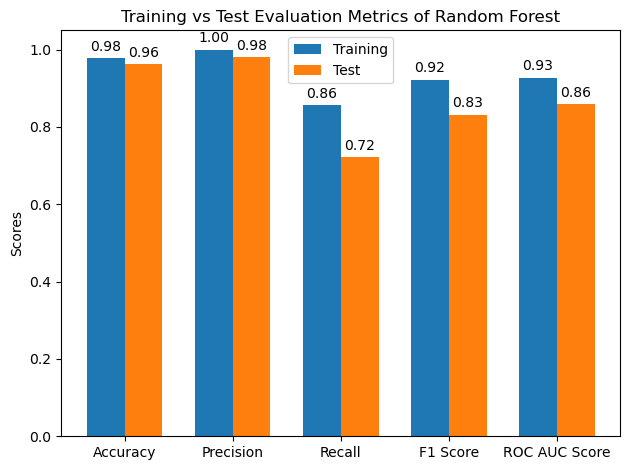

In [191]:
import matplotlib.pyplot as plt
import numpy as np

# Data for training and test evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score']
training_metrics = [0.9788235294117648, 1.0, 0.856, 0.9224137931034483, 0.928]
test_metrics = [0.961764705882353, 0.9817073170731707, 0.7219730941704036, 0.8320413436692508, 0.8599709749795824]

x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, training_metrics, width, label='Training')
rects2 = ax.bar(x + width/2, test_metrics, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Training vs Test Evaluation Metrics of Random Forest')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Attach a text label above each bar in rects, displaying its height.
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


In [192]:
from sklearn.model_selection import cross_validate


cv_results = cross_validate(pipeline_random_forest, x_train, y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])




In [193]:
print("\nTesting Scores:")
print("Accuracy:", cv_results['test_accuracy'].mean())
print("Precision:", cv_results['test_precision'].mean())
print("Recall:", cv_results['test_recall'].mean())
print("F1 Score:", cv_results['test_f1'].mean())
print("ROC AUC Score:", cv_results['test_roc_auc'].mean())



Testing Scores:
Accuracy: 0.943529411764706
Precision: 0.9793567209848429
Recall: 0.6293333333333333
F1 Score: 0.7658206482488022
ROC AUC Score: 0.913704214559387


# pipeline for the knn

# Kneighbor classifier

In [194]:


pipeline_knn = Pipeline([
    ('data_preparation', ColumnTransformer([('onehot', OneHotEncoder(), ohe_cols),('scaling', MinMaxScaler(), scale_cols)])),
    ('classifier',KNeighborsClassifier(n_neighbors=10) )
])



In [195]:
pipeline_knn.fit(x_train,y_train)

Pipeline(steps=[('data_preparation',
                 ColumnTransformer(transformers=[('onehot', OneHotEncoder(),
                                                  ['state',
                                                   'international_plan',
                                                   'voice_mail_plan']),
                                                 ('scaling', MinMaxScaler(),
                                                  ['account_length',
                                                   'area_code',
                                                   'number_vmail_messages',
                                                   'total_day_minutes',
                                                   'total_day_calls',
                                                   'total_day_charge',
                                                   'total_eve_minutes',
                                                   'total_eve_calls',
                                                   'total_eve_charge',
                                                   'total_night_minutes',
                                                   'total_night_calls',
                                                   'total_night_charge',
                                                   'total_intl_minutes',
                                                   'total_intl_calls',
                                                   'total_intl_charge',
                                                   'number_customer_service_calls',
                                                   'total_min', 'total_call',
                                                   'total_charge', 'plan_day',
                                                   'plan_weeks', 'plan_years',
                                                   'charge_day'])])),
                ('classifier', KNeighborsClassifier(n_neighbors=10))])

In [196]:
y_test_pred=pipeline_knn.predict(x_test)
y_train_pred=pipeline_knn.predict(x_train)

In [197]:
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

In [198]:
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred)

In [199]:
print("Training Evaluation Metrics:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1 Score:", train_f1)
print("ROC AUC Score:", train_roc_auc)





Training Evaluation Metrics:
Accuracy: 0.8678431372549019
Precision: 0.8958333333333334
Recall: 0.11466666666666667
F1 Score: 0.20330969267139481
ROC AUC Score: 0.556183908045977


In [200]:
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1)
print("Test ROC AUC Score:", test_roc_auc)

Test Accuracy: 0.8747058823529412
Test Precision: 0.8125
Test Recall: 0.05829596412556054
Test F1 Score: 0.1087866108786611
Test ROC AUC Score: 0.5281324099571607


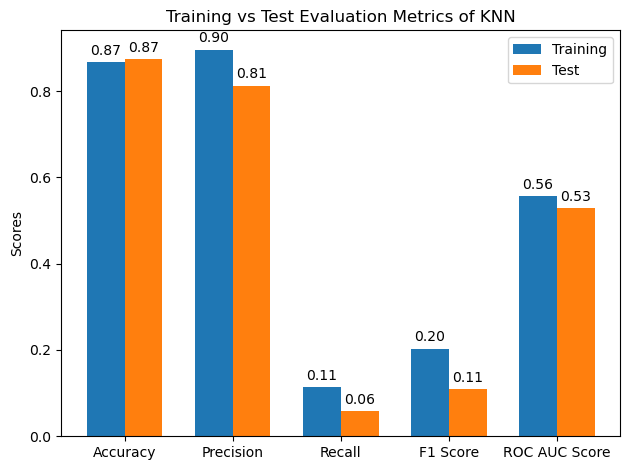

In [201]:
import matplotlib.pyplot as plt
import numpy as np

# Data for training and test evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score']
training_metrics = [0.8678431372549019, 0.8958333333333334, 0.11466666666666667, 0.20330969267139481, 0.556183908045977]
test_metrics = [0.8747058823529412, 0.8125, 0.05829596412556054, 0.1087866108786611, 0.5281324099571607]

x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, training_metrics, width, label='Training')
rects2 = ax.bar(x + width/2, test_metrics, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Training vs Test Evaluation Metrics of KNN')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Attach a text label above each bar in rects, displaying its height.
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


In [202]:


cv_results = cross_validate(pipeline_knn, x_train, y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])




In [203]:
print("\nTesting Scores:")
print("Accuracy:", cv_results['test_accuracy'].mean())
print("Precision:", cv_results['test_precision'].mean())
print("Recall:", cv_results['test_recall'].mean())
print("F1 Score:", cv_results['test_f1'].mean())
print("ROC AUC Score:", cv_results['test_roc_auc'].mean())



Testing Scores:
Accuracy: 0.8619607843137256
Precision: 0.8880952380952382
Recall: 0.07200000000000001
F1 Score: 0.13287531335822061
ROC AUC Score: 0.7268045977011494


In [204]:
# svc

In [205]:


pipeline_svm = Pipeline([
    ('data_preparation', ColumnTransformer([('onehot', OneHotEncoder(), ohe_cols),('scaling', MinMaxScaler(), scale_cols)])),
   ('classifier', SVC(kernel="sigmoid", C=1))
])



In [206]:
pipeline_svm.fit(x_train,y_train)

Pipeline(steps=[('data_preparation',
                 ColumnTransformer(transformers=[('onehot', OneHotEncoder(),
                                                  ['state',
                                                   'international_plan',
                                                   'voice_mail_plan']),
                                                 ('scaling', MinMaxScaler(),
                                                  ['account_length',
                                                   'area_code',
                                                   'number_vmail_messages',
                                                   'total_day_minutes',
                                                   'total_day_calls',
                                                   'total_day_charge',
                                                   'total_eve_minutes',
                                                   'total_eve_calls',
                                                   'total_eve_charge',
                                                   'total_night_minutes',
                                                   'total_night_calls',
                                                   'total_night_charge',
                                                   'total_intl_minutes',
                                                   'total_intl_calls',
                                                   'total_intl_charge',
                                                   'number_customer_service_calls',
                                                   'total_min', 'total_call',
                                                   'total_charge', 'plan_day',
                                                   'plan_weeks', 'plan_years',
                                                   'charge_day'])])),
                ('classifier', SVC(C=1, kernel='sigmoid'))])

In [207]:
y_test_pred=pipeline_svm.predict(x_test)
y_train_pred=pipeline_svm.predict(x_train)

In [208]:
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

In [209]:
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred)

In [210]:
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred)

In [211]:
print("Training Evaluation Metrics:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1 Score:", train_f1)
print("ROC AUC Score:", train_roc_auc)





Training Evaluation Metrics:
Accuracy: 0.8419607843137255
Precision: 0.25
Recall: 0.037333333333333336
F1 Score: 0.06496519721577727
ROC AUC Score: 0.5090114942528736


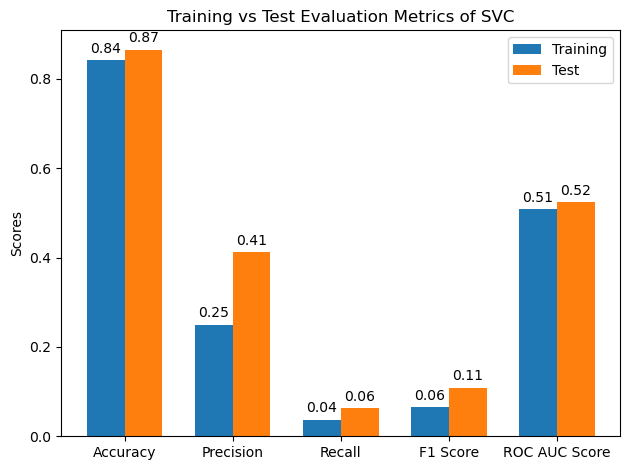

In [212]:
import matplotlib.pyplot as plt
import numpy as np

# Data for training and test evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score']
training_metrics = [
    0.8419607843137255, 
    0.25, 
    0.037333333333333336, 
    0.06496519721577727, 
    0.5090114942528736
]
test_metrics = [
    0.8652941176470588, 
    0.4117647058823529, 
    0.06278026905829596, 
    0.10894941634241245, 
    0.524619653825018
]

x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, training_metrics, width, label='Training')
rects2 = ax.bar(x + width/2, test_metrics, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Training vs Test Evaluation Metrics of SVC')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Attach a text label above each bar in rects, displaying its height.
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


In [213]:


cv_results = cross_validate(pipeline_svm, x_train, y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])




In [214]:
print("\nTesting Scores:")
print("Accuracy:", cv_results['test_accuracy'].mean())
print("Precision:", cv_results['test_precision'].mean())
print("Recall:", cv_results['test_recall'].mean())
print("F1 Score:", cv_results['test_f1'].mean())
print("ROC AUC Score:", cv_results['test_roc_auc'].mean())



Testing Scores:
Accuracy: 0.8454901960784313
Precision: 0.3094871794871795
Recall: 0.04266666666666667
F1 Score: 0.07430479338277116
ROC AUC Score: 0.522752490421456


# # by the cross val score we finalise the decision tree model

In [215]:
# deploying the model

In [216]:
pip install streamlit

In [217]:
from sklearn.pipeline import Pipeline

In [218]:
import pickle
import streamlit as st
# Save the pipeline
with open("strnew1.pkl", "wb") as f:
    pickle.dump(Pipeline, f)


In [219]:
predict=pickle.load(open("strnew1.pkl","rb"))

In [220]:
predict.predict(x_train)

AttributeError: 'DataFrame' object has no attribute '_final_estimator'

In [ ]:
input=x_train.iloc[:1,:]

In [ ]:
input

In [ ]:
predict.predict(input)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define the models and their respective evaluation metrics
models = ['Decision Tree', 'Random Forest', 'KNN', 'SVC']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score']

# Scores for each model
scores = {
    'Decision Tree': [0.9678431372549021, 0.9580279955595643, 0.8186666666666668, 0.8812063067003717, 0.9177624521072797],
    'Random Forest': [0.943529411764706, 0.9793567209848429, 0.6293333333333333, 0.7658206482488022, 0.913704214559387],
    'KNN': [0.8619607843137256, 0.8880952380952382, 0.07200000000000001, 0.13287531335822061, 0.7268045977011494],
    'SVC': [0.8454901960784313, 0.3094871794871795, 0.04266666666666667, 0.07430479338277116, 0.522752490421456]
}

# Convert scores to a NumPy array for easier manipulation
score_array = np.array([scores[model] for model in models])

# Plotting
x = np.arange(len(metrics))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Plot each model's scores as a set of bars
for i, model in enumerate(models):
    ax.bar(x + i*width - width*1.5, score_array[i], width, label=model)

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Cross-Validation Scores by Model and Metric')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Attach a text label above each bar in rects, displaying its height.
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Call autolabel function for each set of bars
for i, model in enumerate(models):
    autolabel(ax.containers[i])

fig.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'matplotlib'